In [1]:
import pandas as pd
import numpy as np
import os
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
# from scipy.stats import kde
from KDEpy import FFTKDE
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
user_files_desktop = os.listdir(data_dir_desktop)

user = []
max_holdtime = []
max_F1 = []
max_F2 = []
max_F3 = []
max_F4 = []
for i in tqdm(range(len(user_files_desktop))):
        user_file_desktop = user_files_desktop[i]
        df_desktop = pd.read_csv(data_dir_desktop+user_file_desktop, header=0)
        df_desktop_dis_1 = df_desktop[df_desktop['Distance']==1]
        user.append(int(user_file_desktop[user_file_desktop.find('_')+1:user_file_desktop.find('.')]))
        max_holdtime.append(df_desktop_dis_1.iloc[:,2].max()) 
        max_F1.append(df_desktop_dis_1.iloc[:,4].max()) 
        max_F2.append(df_desktop_dis_1.iloc[:,5].max())
        max_F3.append(df_desktop_dis_1.iloc[:,6].max())
        max_F4.append(df_desktop_dis_1.iloc[:,7].max())
        
max_df_desktop = pd.DataFrame(list(zip(user,max_holdtime,max_F1,max_F2,max_F3,max_F4)), columns=['user','KH','F1','F2','F3', 'F4'])

  0%|          | 0/116 [00:00<?, ?it/s]

In [7]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
user_files_mobile = os.listdir(data_dir_mobile)

user = []
max_holdtime = []
max_F1 = []
max_F2 = []
max_F3 = []
max_F4 = []
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        df_mobile = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        df_mobile_dis_1 = df_mobile[df_mobile['Distance']==1]
        user.append(int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')]))
        max_holdtime.append(df_mobile_dis_1.iloc[:,2].max()) 
        max_F1.append(df_mobile_dis_1.iloc[:,4].max()) 
        max_F2.append(df_mobile_dis_1.iloc[:,5].max())
        max_F3.append(df_mobile_dis_1.iloc[:,6].max())
        max_F4.append(df_mobile_dis_1.iloc[:,7].max())
        
max_df_mobile = pd.DataFrame(list(zip(user,max_holdtime,max_F1,max_F2,max_F3,max_F4)), columns=['user','KH','F1','F2','F3', 'F4'])

  0%|          | 0/116 [00:00<?, ?it/s]

In [8]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
user_files_tablet = os.listdir(data_dir_tablet)

user = []
max_holdtime = []
max_F1 = []
max_F2 = []
max_F3 = []
max_F4 = []
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        df_tablet = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        df_tablet_dis_1 = df_tablet[df_tablet['Distance']==1]
        user.append(int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')]))
        max_holdtime.append(df_tablet_dis_1.iloc[:,2].max()) 
        max_F1.append(df_tablet_dis_1.iloc[:,4].max()) 
        max_F2.append(df_tablet_dis_1.iloc[:,5].max())
        max_F3.append(df_tablet_dis_1.iloc[:,6].max())
        max_F4.append(df_tablet_dis_1.iloc[:,7].max())
        
max_df_tablet = pd.DataFrame(list(zip(user,max_holdtime,max_F1,max_F2,max_F3,max_F4)), columns=['user','KH','F1','F2','F3', 'F4'])

  0%|          | 0/117 [00:00<?, ?it/s]

In [2]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F1_dis_1 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F1'] = data_frame['F1']/999
        data_frame_dis_1 = data_frame[data_frame['Distance']==1]
        df_F1_dis_1 = data_frame_dis_1[['User','Keys','F1','Distance','Hands']]
        all_users_desktop_F1_dis_1 = all_users_desktop_F1_dis_1.append(df_F1_dis_1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [3]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F1_dis_1 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F1'] = data_frame_m['F1']/999
        data_frame_m_dis_1 = data_frame_m[data_frame_m['Distance']==1]
        df_m_F1_dis_1 = data_frame_m_dis_1[['User','Keys','F1','Distance','Hands']]
        all_users_mobile_F1_dis_1 = all_users_mobile_F1_dis_1.append(df_m_F1_dis_1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [4]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F1_dis_1 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F1'] = data_frame_t['F1']/999
        data_frame_t_dis_1 = data_frame_t[data_frame_t['Distance']==1]
        df_t_F1_dis_1 = data_frame_t_dis_1[['User','Keys','F1','Distance','Hands']]
        all_users_tablet_F1_dis_1 = all_users_tablet_F1_dis_1.append(df_t_F1_dis_1, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [5]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F1_dis_2 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F1'] = data_frame['F1']/999
        data_frame_dis_2 = data_frame[data_frame['Distance']==2]
        df_F1_dis_2 = data_frame_dis_2[['User','Keys','F1','Distance','Hands']]
        all_users_desktop_F1_dis_2 = all_users_desktop_F1_dis_2.append(df_F1_dis_2, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [6]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F1_dis_2 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F1'] = data_frame_m['F1']/999
        data_frame_m_dis_2 = data_frame_m[data_frame_m['Distance']==2]
        df_m_F1_dis_2 = data_frame_m_dis_2[['User','Keys','F1','Distance','Hands']]
        all_users_mobile_F1_dis_2 = all_users_mobile_F1_dis_2.append(df_m_F1_dis_2, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [7]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F1_dis_2 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F1'] = data_frame_t['F1']/998
        data_frame_t_dis_2 = data_frame_t[data_frame_t['Distance']==2]
        df_t_F1_dis_2 = data_frame_t_dis_2[['User','Keys','F1','Distance','Hands']]
        all_users_tablet_F1_dis_2 = all_users_tablet_F1_dis_2.append(df_t_F1_dis_2, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [8]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F1_dis_3 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F1'] = data_frame['F1']/999
        data_frame_dis_3 = data_frame[data_frame['Distance']==3]
        df_F1_dis_3 = data_frame_dis_3[['User','Keys','F1','Distance','Hands']]
        all_users_desktop_F1_dis_3 = all_users_desktop_F1_dis_3.append(df_F1_dis_3, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [9]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F1_dis_3 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F1'] = data_frame_m['F1']/998
        data_frame_m_dis_3 = data_frame_m[data_frame_m['Distance']==3]
        df_m_F1_dis_3 = data_frame_m_dis_3[['User','Keys','F1','Distance','Hands']]
        all_users_mobile_F1_dis_3 = all_users_mobile_F1_dis_3.append(df_m_F1_dis_3, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [10]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F1_dis_3 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F1'] = data_frame_t['F1']/998
        data_frame_t_dis_3 = data_frame_t[data_frame_t['Distance']==3]
        df_t_F1_dis_3 = data_frame_t_dis_3[['User','Keys','F1','Distance','Hands']]
        all_users_tablet_F1_dis_3 = all_users_tablet_F1_dis_3.append(df_t_F1_dis_3, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [11]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F2_dis_1 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F2'] = data_frame['F2']/999
        data_frame_dis_1 = data_frame[data_frame['Distance']==1]
        df_F2_dis_1 = data_frame_dis_1[['User','Keys','F2','Distance','Hands']]
        all_users_desktop_F2_dis_1 = all_users_desktop_F2_dis_1.append(df_F2_dis_1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [12]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F2_dis_1 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F2'] = data_frame_m['F2']/997
        data_frame_m_dis_1 = data_frame_m[data_frame_m['Distance']==1]
        df_m_F2_dis_1 = data_frame_m_dis_1[['User','Keys','F2','Distance','Hands']]
        all_users_mobile_F2_dis_1 = all_users_mobile_F2_dis_1.append(df_m_F2_dis_1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [13]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F2_dis_1 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F2'] = data_frame_t['F2']/999
        data_frame_t_dis_1 = data_frame_t[data_frame_t['Distance']==1]
        df_t_F2_dis_1 = data_frame_t_dis_1[['User','Keys','F2','Distance','Hands']]
        all_users_tablet_F2_dis_1 = all_users_tablet_F2_dis_1.append(df_t_F2_dis_1, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [14]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F2_dis_2 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F2'] = data_frame['F2']/999
        data_frame_dis_2 = data_frame[data_frame['Distance']==2]
        df_F2_dis_2 = data_frame_dis_2[['User','Keys','F2','Distance','Hands']]
        all_users_desktop_F2_dis_2 = all_users_desktop_F2_dis_2.append(df_F2_dis_2, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [15]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F2_dis_2 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F2'] = data_frame_m['F2']/999
        data_frame_m_dis_2 = data_frame_m[data_frame_m['Distance']==2]
        df_m_F2_dis_2 = data_frame_m_dis_2[['User','Keys','F2','Distance','Hands']]
        all_users_mobile_F2_dis_2 = all_users_mobile_F2_dis_2.append(df_m_F2_dis_2, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [16]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F2_dis_2 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F2'] = data_frame_t['F2']/999
        data_frame_t_dis_2 = data_frame_t[data_frame_t['Distance']==2]
        df_t_F2_dis_2 = data_frame_t_dis_2[['User','Keys','F2','Distance','Hands']]
        all_users_tablet_F2_dis_2 = all_users_tablet_F2_dis_2.append(df_t_F2_dis_2, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [17]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F2_dis_3 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F2'] = data_frame['F2']/999
        data_frame_dis_3 = data_frame[data_frame['Distance']==3]
        df_F2_dis_3 = data_frame_dis_3[['User','Keys','F2','Distance','Hands']]
        all_users_desktop_F2_dis_3 = all_users_desktop_F2_dis_3.append(df_F2_dis_3, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [18]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F2_dis_3 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F2'] = data_frame_m['F2']/998
        data_frame_m_dis_3 = data_frame_m[data_frame_m['Distance']==3]
        df_m_F2_dis_3 = data_frame_m_dis_3[['User','Keys','F2','Distance','Hands']]
        all_users_mobile_F2_dis_3 = all_users_mobile_F2_dis_3.append(df_m_F2_dis_3, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [19]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F2_dis_3 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F2'] = data_frame_t['F2']/999
        data_frame_t_dis_3 = data_frame_t[data_frame_t['Distance']==3]
        df_t_F2_dis_3 = data_frame_t_dis_3[['User','Keys','F2','Distance','Hands']]
        all_users_tablet_F2_dis_3 = all_users_tablet_F2_dis_3.append(df_t_F2_dis_3, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [20]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F3_dis_1 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F3'] = data_frame['F3']/999
        data_frame_dis_1 = data_frame[data_frame['Distance']==1]
        df_F3_dis_1 = data_frame_dis_1[['User','Keys','F3','Distance','Hands']]
        all_users_desktop_F3_dis_1 = all_users_desktop_F3_dis_1.append(df_F3_dis_1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [21]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F3_dis_1 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F3'] = data_frame_m['F3']/996
        data_frame_m_dis_1 = data_frame_m[data_frame_m['Distance']==1]
        df_m_F3_dis_1 = data_frame_m_dis_1[['User','Keys','F3','Distance','Hands']]
        all_users_mobile_F3_dis_1 = all_users_mobile_F3_dis_1.append(df_m_F3_dis_1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [22]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F3_dis_1 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F3'] = data_frame_t['F3']/997
        data_frame_t_dis_1 = data_frame_t[data_frame_t['Distance']==1]
        df_t_F3_dis_1 = data_frame_t_dis_1[['User','Keys','F3','Distance','Hands']]
        all_users_tablet_F3_dis_1 = all_users_tablet_F3_dis_1.append(df_t_F3_dis_1, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [23]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F3_dis_2 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F3'] = data_frame['F3']/999
        data_frame_dis_2 = data_frame[data_frame['Distance']==2]
        df_F3_dis_2 = data_frame_dis_2[['User','Keys','F3','Distance','Hands']]
        all_users_desktop_F3_dis_2 = all_users_desktop_F3_dis_2.append(df_F3_dis_2, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [24]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F3_dis_2 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F3'] = data_frame_m['F3']/999
        data_frame_m_dis_2 = data_frame_m[data_frame_m['Distance']==2]
        df_m_F3_dis_2 = data_frame_m_dis_2[['User','Keys','F3','Distance','Hands']]
        all_users_mobile_F3_dis_2 = all_users_mobile_F3_dis_2.append(df_m_F3_dis_2, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [25]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F3_dis_2 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F3'] = data_frame_t['F3']/999
        data_frame_t_dis_2 = data_frame_t[data_frame_t['Distance']==2]
        df_t_F3_dis_2 = data_frame_t_dis_2[['User','Keys','F3','Distance','Hands']]
        all_users_tablet_F3_dis_2 = all_users_tablet_F3_dis_2.append(df_t_F3_dis_2, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [26]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F3_dis_3 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F3'] = data_frame['F3']/999
        data_frame_dis_3 = data_frame[data_frame['Distance']==3]
        df_F3_dis_3 = data_frame_dis_3[['User','Keys','F3','Distance','Hands']]
        all_users_desktop_F3_dis_3 = all_users_desktop_F3_dis_3.append(df_F3_dis_3, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [27]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F3_dis_3 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F3'] = data_frame_m['F3']/999
        data_frame_m_dis_3 = data_frame_m[data_frame_m['Distance']==3]
        df_m_F3_dis_3 = data_frame_m_dis_3[['User','Keys','F3','Distance','Hands']]
        all_users_mobile_F3_dis_3 = all_users_mobile_F3_dis_3.append(df_m_F3_dis_3, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [28]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F3_dis_3 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F3'] = data_frame_t['F3']/998
        data_frame_t_dis_3 = data_frame_t[data_frame_t['Distance']==3]
        df_t_F3_dis_3 = data_frame_t_dis_3[['User','Keys','F3','Distance','Hands']]
        all_users_tablet_F3_dis_3 = all_users_tablet_F3_dis_3.append(df_t_F3_dis_3, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [29]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F4_dis_1 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F4'] = data_frame['F4']/999
        data_frame_dis_1 = data_frame[data_frame['Distance']==1]
        df_F4_dis_1 = data_frame_dis_1[['User','Keys','F4','Distance','Hands']]
        all_users_desktop_F4_dis_1 = all_users_desktop_F4_dis_1.append(df_F4_dis_1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [30]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F4_dis_1 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F4'] = data_frame_m['F4']/999
        data_frame_m_dis_1 = data_frame_m[data_frame_m['Distance']==1]
        df_m_F4_dis_1 = data_frame_m_dis_1[['User','Keys','F4','Distance','Hands']]
        all_users_mobile_F4_dis_1 = all_users_mobile_F4_dis_1.append(df_m_F4_dis_1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [31]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F4_dis_1 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F4'] = data_frame_t['F4']/999
        data_frame_t_dis_1 = data_frame_t[data_frame_t['Distance']==1]
        df_t_F4_dis_1 = data_frame_t_dis_1[['User','Keys','F4','Distance','Hands']]
        all_users_tablet_F4_dis_1 = all_users_tablet_F4_dis_1.append(df_t_F4_dis_1, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [32]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F4_dis_2 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F4'] = data_frame['F4']/999
        data_frame_dis_2 = data_frame[data_frame['Distance']==2]
        df_F4_dis_2 = data_frame_dis_2[['User','Keys','F4','Distance','Hands']]
        all_users_desktop_F4_dis_2 = all_users_desktop_F4_dis_2.append(df_F4_dis_2, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [33]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F4_dis_2 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F4'] = data_frame_m['F4']/999
        data_frame_m_dis_2 = data_frame_m[data_frame_m['Distance']==2]
        df_m_F4_dis_2 = data_frame_m_dis_2[['User','Keys','F4','Distance','Hands']]
        all_users_mobile_F4_dis_2 = all_users_mobile_F4_dis_2.append(df_m_F4_dis_2, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [34]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F4_dis_2 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F4'] = data_frame_t['F4']/999
        data_frame_t_dis_2 = data_frame_t[data_frame_t['Distance']==2]
        df_t_F4_dis_2 = data_frame_t_dis_2[['User','Keys','F4','Distance','Hands']]
        all_users_tablet_F4_dis_2 = all_users_tablet_F4_dis_2.append(df_t_F4_dis_2, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [35]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F4_dis_3 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F4'] = data_frame['F4']/999
        data_frame_dis_3 = data_frame[data_frame['Distance']==3]
        df_F4_dis_3 = data_frame_dis_3[['User','Keys','F4','Distance','Hands']]
        all_users_desktop_F4_dis_3 = all_users_desktop_F4_dis_3.append(df_F4_dis_3, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [36]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F4_dis_3 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame_m['User'] = curr_user_ind_mobile
        data_frame_m['F4'] = data_frame_m['F4']/999
        data_frame_m_dis_3 = data_frame_m[data_frame_m['Distance']==3]
        df_m_F4_dis_3 = data_frame_m_dis_3[['User','Keys','F4','Distance','Hands']]
        all_users_mobile_F4_dis_3 = all_users_mobile_F4_dis_3.append(df_m_F4_dis_3, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [37]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F4_dis_3 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['User'] = curr_user_ind_tablet
        data_frame_t['F4'] = data_frame_t['F4']/999
        data_frame_t_dis_3 = data_frame_t[data_frame_t['Distance']==3]
        df_t_F4_dis_3 = data_frame_t_dis_3[['User','Keys','F4','Distance','Hands']]
        all_users_tablet_F4_dis_3 = all_users_tablet_F4_dis_3.append(df_t_F4_dis_3, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [51]:
all_users_desktop_F1_dis_1.sample(frac=0.4)

,User,Keys,F1,Distance,Hands
34468,51,"s,d",0.969970,1,LL
43986,69,"e,s",0.094094,1,LL
16643,22,"o,l",0.094094,1,RR
28795,42,"e,r",0.969970,1,LL
43171,67,"r,e",0.828829,1,LL
...,...,...,...,...,...
41096,63,"e,d",0.105105,1,LL
58246,92,"s,e",0.389389,1,LL
1176,100,"s,e",0.912913,1,LL
51604,80,"e,r",0.969970,1,LL


In [39]:
# x_train,x_test = train_test_split(all_users_desktop_F1_dis_1['F1'], test_size=0.4, random_state=10)
# x = np.sort(np.array(x_train))[:, np.newaxis]
# y = np.sort(np.array(x_test))[:, np.newaxis]

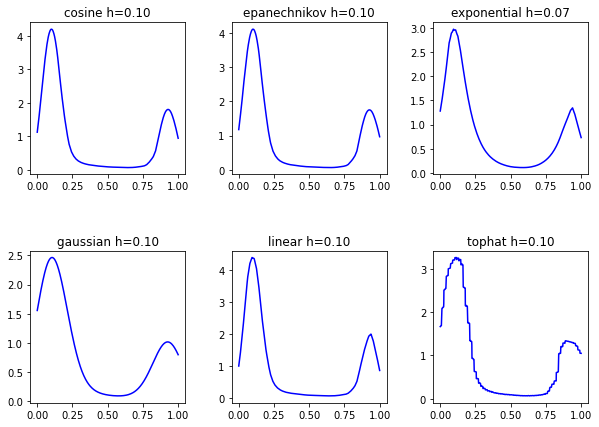

In [42]:
def my_scores(estimator, X):
    scores = estimator.score_samples(X)
    
    scores = scores[scores != float('-inf')]
    
    return np.mean(scores)

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231
h_vals = np.arange(0.0075,0.1, 0.0025)

for k, ind in zip(kernels, plt_ind):
        grid = GridSearchCV(KernelDensity(kernel=k),
                        {'bandwidth': h_vals},
                        scoring=my_scores)
        grid.fit(x)
        kde = grid.best_estimator_
        log_dens = kde.score_samples(y)
        plt.subplot(ind)
        plt.plot(y, np.exp(log_dens), c='blue')
        plt.title(k + " h=" + "{:.2f}".format(kde.bandwidth))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

In [46]:
def my_scores(estimator, X):
    scores = estimator.score_samples(X)
    
    scores = scores[scores != float('-inf')]
    
    return np.mean(scores)

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
h_vals = np.arange(0.0075,0.1, 0.0025)
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': h_vals, 'kernel': kernels},
                    scoring=my_scores)
grid.fit(x)
best_kde = grid.best_estimator_
log_dens = best_kde.score_samples(y)
plt.plot(y, np.exp(log_dens), c='green')
plt.title("Best Kernel: " + best_kde.kernel+" h="+"{:.2f}".format(best_kde.bandwidth))
plt.show()

KeyboardInterrupt: 

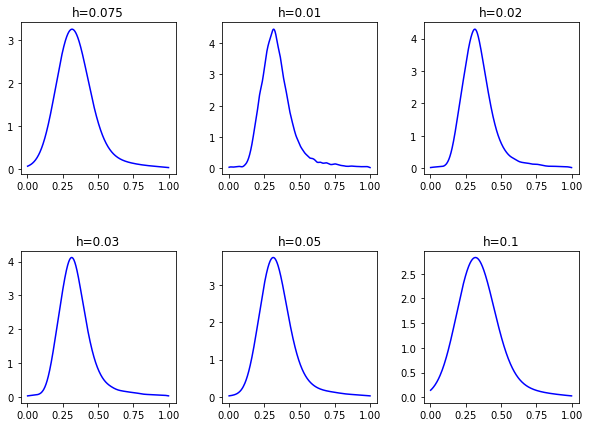

In [220]:
# bandwidths = [0.075, 0.01, 0.02, 0.03, 0.05, 0.1 ]
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
# plt_ind = np.arange(6) + 231

# for b, ind in zip(bandwidths, plt_ind):
#     kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
#     kde_model.fit(x)
#     score = kde_model.score_samples(y)
#     plt.subplot(ind)
#     plt.plot(y, np.exp(score), c='blue')
#     plt.title("h="+str(b))

# fig.subplots_adjust(hspace=0.5, wspace=.3)
# plt.show()

<AxesSubplot:>

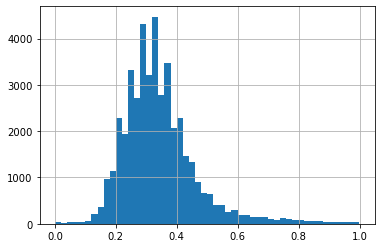

In [221]:
all_users_tablet_F4_dis_3['F4'].hist(bins=50)

In [41]:
User_1_Dis_1_desktop = all_users_desktop_F1_dis_1[(all_users_desktop_F1_dis_1['User']==1) & (all_users_desktop_F1_dis_1['Hands']!= 'LR')]
User_2_Dis_1_desktop = all_users_desktop_F1_dis_1[(all_users_desktop_F1_dis_1['User']==2) & (all_users_desktop_F1_dis_1['Hands']!= 'LR')]
User_70_Dis_1_desktop = all_users_desktop_F1_dis_1[(all_users_desktop_F1_dis_1['User']==70) & (all_users_desktop_F1_dis_1['Hands']!= 'LR')]

User_1_Dis_2_desktop = all_users_desktop_F1_dis_2[(all_users_desktop_F1_dis_2['User']==1) & (all_users_desktop_F1_dis_2['Hands']!= 'LR')]
User_2_Dis_2_desktop = all_users_desktop_F1_dis_2[(all_users_desktop_F1_dis_2['User']==2) & (all_users_desktop_F1_dis_2['Hands']!= 'LR')]
User_70_Dis_2_desktop = all_users_desktop_F1_dis_2[(all_users_desktop_F1_dis_2['User']==70) & (all_users_desktop_F1_dis_2['Hands']!= 'LR')]

User_1_Dis_3_desktop = all_users_desktop_F1_dis_3[(all_users_desktop_F1_dis_3['User']==1) & (all_users_desktop_F1_dis_3['Hands']!= 'LR')]
User_2_Dis_3_desktop = all_users_desktop_F1_dis_3[(all_users_desktop_F1_dis_3['User']==2) & (all_users_desktop_F1_dis_3['Hands']!= 'LR')]
User_70_Dis_3_desktop = all_users_desktop_F1_dis_3[(all_users_desktop_F1_dis_3['User']==70) & (all_users_desktop_F1_dis_3['Hands']!= 'LR')]

In [42]:
User_1_Dis_1_mobile = all_users_mobile_F1_dis_1[(all_users_mobile_F1_dis_1['User']==1) &  (all_users_mobile_F1_dis_1['Hands']!= 'LR')]
User_2_Dis_1_mobile = all_users_mobile_F1_dis_1[(all_users_mobile_F1_dis_1['User']==2) & (all_users_mobile_F1_dis_1['Hands']!= 'LR')]
User_70_Dis_1_mobile = all_users_mobile_F1_dis_1[(all_users_mobile_F1_dis_1['User']==70) & (all_users_mobile_F1_dis_1['Hands']!= 'LR')]

User_1_Dis_2_mobile = all_users_mobile_F1_dis_2[(all_users_mobile_F1_dis_2['User']==1) & (all_users_mobile_F1_dis_2['Hands']!= 'LR')]
User_2_Dis_2_mobile = all_users_mobile_F1_dis_2[(all_users_mobile_F1_dis_2['User']==2) & (all_users_mobile_F1_dis_2['Hands']!= 'LR')]
User_70_Dis_2_mobile = all_users_mobile_F1_dis_2[(all_users_mobile_F1_dis_2['User']==70) & (all_users_mobile_F1_dis_2['Hands']!= 'LR')]

User_1_Dis_3_mobile = all_users_desktop_F1_dis_3[(all_users_desktop_F1_dis_3['User']==1) & (all_users_desktop_F1_dis_3['Hands']!= 'LR')]
User_2_Dis_3_mobile = all_users_desktop_F1_dis_3[(all_users_desktop_F1_dis_3['User']==2) & (all_users_desktop_F1_dis_3['Hands']!= 'LR')]
User_70_Dis_3_mobile = all_users_desktop_F1_dis_3[(all_users_desktop_F1_dis_3['User']==70) & (all_users_desktop_F1_dis_3['Hands']!= 'LR')]


In [43]:
User_1_Dis_1_tablet = all_users_tablet_F1_dis_1[(all_users_tablet_F1_dis_1['User']==1) &  (all_users_tablet_F1_dis_1['Hands']!= 'LR')]
User_2_Dis_1_tablet = all_users_tablet_F1_dis_1[(all_users_tablet_F1_dis_1['User']==2) & (all_users_tablet_F1_dis_1['Hands']!= 'LR')]
User_70_Dis_1_tablet = all_users_tablet_F1_dis_1[(all_users_tablet_F1_dis_1['User']==70) & (all_users_tablet_F1_dis_1['Hands']!= 'LR')]

User_1_Dis_2_tablet = all_users_tablet_F1_dis_2[(all_users_tablet_F1_dis_2['User']==1) &  (all_users_tablet_F1_dis_2['Hands']!= 'LR')]
User_2_Dis_2_tablet = all_users_tablet_F1_dis_2[(all_users_tablet_F1_dis_2['User']==2) & (all_users_tablet_F1_dis_2['Hands']!= 'LR')]
User_70_Dis_2_tablet = all_users_tablet_F1_dis_2[(all_users_tablet_F1_dis_2['User']==70) & (all_users_tablet_F1_dis_2['Hands']!= 'LR')]

User_1_Dis_3_tablet = all_users_tablet_F1_dis_3[(all_users_tablet_F1_dis_3['User']==1) &  (all_users_tablet_F1_dis_3['Hands']!= 'LR')]
User_2_Dis_3_tablet = all_users_tablet_F1_dis_3[(all_users_tablet_F1_dis_3['User']==2) & (all_users_tablet_F1_dis_3['Hands']!= 'LR')]
User_70_Dis_3_tablet = all_users_tablet_F1_dis_3[(all_users_tablet_F1_dis_3['User']==70) & (all_users_tablet_F1_dis_3['Hands']!= 'LR')]


In [44]:
User_1_Dis_1_desktop_F2 = all_users_desktop_F2_dis_1[(all_users_desktop_F2_dis_1['User']==1) & (all_users_desktop_F2_dis_1['Hands']!= 'LR')]
User_2_Dis_1_desktop_F2 = all_users_desktop_F2_dis_1[(all_users_desktop_F2_dis_1['User']==2) & (all_users_desktop_F2_dis_1['Hands']!= 'LR')]
User_70_Dis_1_desktop_F2 = all_users_desktop_F2_dis_1[(all_users_desktop_F2_dis_1['User']==70) & (all_users_desktop_F2_dis_1['Hands']!= 'LR')]

User_1_Dis_2_desktop_F2 = all_users_desktop_F2_dis_2[(all_users_desktop_F2_dis_2['User']==1) & (all_users_desktop_F2_dis_2['Hands']!= 'LR')]
User_2_Dis_2_desktop_F2 = all_users_desktop_F2_dis_2[(all_users_desktop_F2_dis_2['User']==2) & (all_users_desktop_F2_dis_2['Hands']!= 'LR')]
User_70_Dis_2_desktop_F2 = all_users_desktop_F2_dis_2[(all_users_desktop_F2_dis_2['User']==70) & (all_users_desktop_F2_dis_2['Hands']!= 'LR')]

User_1_Dis_3_desktop_F2 = all_users_desktop_F2_dis_3[(all_users_desktop_F2_dis_3['User']==1) & (all_users_desktop_F2_dis_3['Hands']!= 'LR')]
User_2_Dis_3_desktop_F2 = all_users_desktop_F2_dis_3[(all_users_desktop_F2_dis_3['User']==2) & (all_users_desktop_F2_dis_3['Hands']!= 'LR')]
User_70_Dis_3_desktop_F2 = all_users_desktop_F2_dis_3[(all_users_desktop_F2_dis_3['User']==70) & (all_users_desktop_F2_dis_3['Hands']!= 'LR')]

In [45]:
User_1_Dis_1_mobile_F2 = all_users_mobile_F2_dis_1[(all_users_mobile_F2_dis_1['User']==1) &  (all_users_mobile_F2_dis_1['Hands']!= 'LR')]
User_2_Dis_1_mobile_F2 = all_users_mobile_F2_dis_1[(all_users_mobile_F2_dis_1['User']==2) & (all_users_mobile_F2_dis_1['Hands']!= 'LR')]
User_70_Dis_1_mobile_F2 = all_users_mobile_F2_dis_1[(all_users_mobile_F2_dis_1['User']==70) & (all_users_mobile_F2_dis_1['Hands']!= 'LR')]

User_1_Dis_2_mobile_F2 = all_users_mobile_F2_dis_2[(all_users_mobile_F2_dis_2['User']==1) & (all_users_mobile_F2_dis_2['Hands']!= 'LR')]
User_2_Dis_2_mobile_F2 = all_users_mobile_F2_dis_2[(all_users_mobile_F2_dis_2['User']==2) & (all_users_mobile_F2_dis_2['Hands']!= 'LR')]
User_70_Dis_2_mobile_F2 = all_users_mobile_F2_dis_2[(all_users_mobile_F2_dis_2['User']==70) & (all_users_mobile_F2_dis_2['Hands']!= 'LR')]

User_1_Dis_3_mobile_F2 = all_users_mobile_F2_dis_3[(all_users_mobile_F2_dis_3['User']==1) & (all_users_mobile_F2_dis_3['Hands']!= 'LR')]
User_2_Dis_3_mobile_F2 = all_users_mobile_F2_dis_3[(all_users_mobile_F2_dis_3['User']==2) & (all_users_mobile_F2_dis_3['Hands']!= 'LR')]
User_70_Dis_3_mobile_F2 = all_users_mobile_F2_dis_3[(all_users_mobile_F2_dis_3['User']==70) & (all_users_mobile_F2_dis_3['Hands']!= 'LR')]

In [46]:
User_1_Dis_1_tablet_F2 = all_users_tablet_F2_dis_1[(all_users_tablet_F2_dis_1['User']==1) &  (all_users_tablet_F2_dis_1['Hands']!= 'LR')]
User_2_Dis_1_tablet_F2 = all_users_tablet_F2_dis_1[(all_users_tablet_F2_dis_1['User']==2) & (all_users_tablet_F2_dis_1['Hands']!= 'LR')]
User_70_Dis_1_tablet_F2 = all_users_tablet_F2_dis_1[(all_users_tablet_F2_dis_1['User']==70) & (all_users_tablet_F2_dis_1['Hands']!= 'LR')]

User_1_Dis_2_tablet_F2 = all_users_tablet_F2_dis_2[(all_users_tablet_F2_dis_2['User']==1) & (all_users_tablet_F2_dis_2['Hands']!= 'LR')]
User_2_Dis_2_tablet_F2 = all_users_tablet_F2_dis_2[(all_users_tablet_F2_dis_2['User']==2) & (all_users_tablet_F2_dis_2['Hands']!= 'LR')]
User_70_Dis_2_tablet_F2 = all_users_tablet_F2_dis_2[(all_users_tablet_F2_dis_2['User']==70) & (all_users_tablet_F2_dis_2['Hands']!= 'LR')]

User_1_Dis_3_tablet_F2 = all_users_tablet_F2_dis_3[(all_users_tablet_F2_dis_3['User']==1) &  (all_users_tablet_F2_dis_3['Hands']!= 'LR')]
User_2_Dis_3_tablet_F2 = all_users_tablet_F2_dis_3[(all_users_tablet_F2_dis_3['User']==2) & (all_users_tablet_F2_dis_3['Hands']!= 'LR')]
User_70_Dis_3_tablet_F2 = all_users_tablet_F2_dis_3[(all_users_tablet_F2_dis_3['User']==70) & (all_users_tablet_F2_dis_3['Hands']!= 'LR')]

In [47]:
User_1_Dis_1_desktop_F3 = all_users_desktop_F3_dis_1[(all_users_desktop_F3_dis_1['User']==1) & (all_users_desktop_F3_dis_1['Hands']!= 'LR')]
User_2_Dis_1_desktop_F3 = all_users_desktop_F3_dis_1[(all_users_desktop_F3_dis_1['User']==2) & (all_users_desktop_F3_dis_1['Hands']!= 'LR')]
User_70_Dis_1_desktop_F3 = all_users_desktop_F3_dis_1[(all_users_desktop_F3_dis_1['User']==70) & (all_users_desktop_F3_dis_1['Hands']!= 'LR')]

User_1_Dis_2_desktop_F3 = all_users_desktop_F3_dis_2[(all_users_desktop_F3_dis_2['User']==1) & (all_users_desktop_F3_dis_2['Hands']!= 'LR')]
User_2_Dis_2_desktop_F3 = all_users_desktop_F3_dis_2[(all_users_desktop_F3_dis_2['User']==2) & (all_users_desktop_F3_dis_2['Hands']!= 'LR')]
User_70_Dis_2_desktop_F3 = all_users_desktop_F3_dis_2[(all_users_desktop_F3_dis_2['User']==70) & (all_users_desktop_F3_dis_2['Hands']!= 'LR')]

User_1_Dis_3_desktop_F3 = all_users_desktop_F3_dis_3[(all_users_desktop_F3_dis_3['User']==1) & (all_users_desktop_F3_dis_3['Hands']!= 'LR')]
User_2_Dis_3_desktop_F3 = all_users_desktop_F3_dis_3[(all_users_desktop_F3_dis_3['User']==2) & (all_users_desktop_F3_dis_3['Hands']!= 'LR')]
User_70_Dis_3_desktop_F3 = all_users_desktop_F3_dis_3[(all_users_desktop_F3_dis_3['User']==70) & (all_users_desktop_F3_dis_3['Hands']!= 'LR')]

In [48]:
User_1_Dis_1_mobile_F3 = all_users_mobile_F3_dis_1[(all_users_mobile_F3_dis_1['User']==1) &  (all_users_mobile_F3_dis_1['Hands']!= 'LR')]
User_2_Dis_1_mobile_F3 = all_users_mobile_F3_dis_1[(all_users_mobile_F3_dis_1['User']==2) & (all_users_mobile_F3_dis_1['Hands']!= 'LR')]
User_70_Dis_1_mobile_F3 = all_users_mobile_F3_dis_1[(all_users_mobile_F3_dis_1['User']==70) & (all_users_mobile_F3_dis_1['Hands']!= 'LR')]

User_1_Dis_2_mobile_F3 = all_users_mobile_F3_dis_2[(all_users_mobile_F3_dis_2['User']==1) & (all_users_mobile_F3_dis_2['Hands']!= 'LR')]
User_2_Dis_2_mobile_F3 = all_users_mobile_F3_dis_2[(all_users_mobile_F3_dis_2['User']==2) & (all_users_mobile_F3_dis_2['Hands']!= 'LR')]
User_70_Dis_2_mobile_F3 = all_users_mobile_F3_dis_2[(all_users_mobile_F3_dis_2['User']==70) & (all_users_mobile_F3_dis_2['Hands']!= 'LR')]

User_1_Dis_3_mobile_F3 = all_users_mobile_F3_dis_3[(all_users_mobile_F3_dis_3['User']==1) & (all_users_mobile_F3_dis_3['Hands']!= 'LR')]
User_2_Dis_3_mobile_F3 = all_users_mobile_F3_dis_3[(all_users_mobile_F3_dis_3['User']==2) & (all_users_mobile_F3_dis_3['Hands']!= 'LR')]
User_70_Dis_3_mobile_F3 = all_users_mobile_F3_dis_3[(all_users_mobile_F3_dis_3['User']==70) & (all_users_mobile_F3_dis_3['Hands']!= 'LR')]

In [49]:
User_1_Dis_1_tablet_F3 = all_users_tablet_F3_dis_1[(all_users_tablet_F3_dis_1['User']==1) &  (all_users_tablet_F3_dis_1['Hands']!= 'LR')]
User_2_Dis_1_tablet_F3 = all_users_tablet_F3_dis_1[(all_users_tablet_F3_dis_1['User']==2) & (all_users_tablet_F3_dis_1['Hands']!= 'LR')]
User_70_Dis_1_tablet_F3 = all_users_tablet_F3_dis_1[(all_users_tablet_F3_dis_1['User']==70) & (all_users_tablet_F3_dis_1['Hands']!= 'LR')]

User_1_Dis_2_tablet_F3 = all_users_tablet_F3_dis_2[(all_users_tablet_F3_dis_2['User']==1) & (all_users_tablet_F3_dis_2['Hands']!= 'LR')]
User_2_Dis_2_tablet_F3 = all_users_tablet_F3_dis_2[(all_users_tablet_F3_dis_2['User']==2) & (all_users_tablet_F3_dis_2['Hands']!= 'LR')]
User_70_Dis_2_tablet_F3 = all_users_tablet_F3_dis_2[(all_users_tablet_F3_dis_2['User']==70) & (all_users_tablet_F3_dis_2['Hands']!= 'LR')]

User_1_Dis_3_tablet_F3 = all_users_tablet_F3_dis_3[(all_users_tablet_F3_dis_3['User']==1) &  (all_users_tablet_F3_dis_3['Hands']!= 'LR')]
User_2_Dis_3_tablet_F3 = all_users_tablet_F3_dis_3[(all_users_tablet_F3_dis_3['User']==2) & (all_users_tablet_F3_dis_3['Hands']!= 'LR')]
User_70_Dis_3_tablet_F3 = all_users_tablet_F3_dis_3[(all_users_tablet_F3_dis_3['User']==70) & (all_users_tablet_F3_dis_3['Hands']!= 'LR')]

In [50]:
User_1_Dis_1_desktop_F4 = all_users_desktop_F4_dis_1[(all_users_desktop_F4_dis_1['User']==1) & (all_users_desktop_F4_dis_1['Hands']!= 'LR')]
User_2_Dis_1_desktop_F4 = all_users_desktop_F4_dis_1[(all_users_desktop_F4_dis_1['User']==2) & (all_users_desktop_F4_dis_1['Hands']!= 'LR')]
User_70_Dis_1_desktop_F4 = all_users_desktop_F4_dis_1[(all_users_desktop_F4_dis_1['User']==70) & (all_users_desktop_F4_dis_1['Hands']!= 'LR')]

User_1_Dis_2_desktop_F4 = all_users_desktop_F4_dis_2[(all_users_desktop_F4_dis_2['User']==1) & (all_users_desktop_F4_dis_2['Hands']!= 'LR')]
User_2_Dis_2_desktop_F4 = all_users_desktop_F4_dis_2[(all_users_desktop_F4_dis_2['User']==2) & (all_users_desktop_F4_dis_2['Hands']!= 'LR')]
User_70_Dis_2_desktop_F4 = all_users_desktop_F4_dis_2[(all_users_desktop_F4_dis_2['User']==70) & (all_users_desktop_F4_dis_2['Hands']!= 'LR')]

User_1_Dis_3_desktop_F4 = all_users_desktop_F4_dis_3[(all_users_desktop_F4_dis_3['User']==1) & (all_users_desktop_F4_dis_3['Hands']!= 'LR')]
User_2_Dis_3_desktop_F4 = all_users_desktop_F4_dis_3[(all_users_desktop_F4_dis_3['User']==2) & (all_users_desktop_F4_dis_3['Hands']!= 'LR')]
User_70_Dis_3_desktop_F4 = all_users_desktop_F4_dis_3[(all_users_desktop_F4_dis_3['User']==70) & (all_users_desktop_F4_dis_3['Hands']!= 'LR')]

In [51]:
User_1_Dis_1_mobile_F4 = all_users_mobile_F4_dis_1[(all_users_mobile_F4_dis_1['User']==1) &  (all_users_mobile_F4_dis_1['Hands']!= 'LR')]
User_2_Dis_1_mobile_F4 = all_users_mobile_F4_dis_1[(all_users_mobile_F4_dis_1['User']==2) & (all_users_mobile_F4_dis_1['Hands']!= 'LR')]
User_70_Dis_1_mobile_F4 = all_users_mobile_F4_dis_1[(all_users_mobile_F4_dis_1['User']==70) & (all_users_mobile_F4_dis_1['Hands']!= 'LR')]

User_1_Dis_2_mobile_F4 = all_users_mobile_F4_dis_2[(all_users_mobile_F4_dis_2['User']==1) & (all_users_mobile_F4_dis_2['Hands']!= 'LR')]
User_2_Dis_2_mobile_F4 = all_users_mobile_F4_dis_2[(all_users_mobile_F4_dis_2['User']==2) & (all_users_mobile_F4_dis_2['Hands']!= 'LR')]
User_70_Dis_2_mobile_F4 = all_users_mobile_F4_dis_2[(all_users_mobile_F4_dis_2['User']==70) & (all_users_mobile_F4_dis_2['Hands']!= 'LR')]

User_1_Dis_3_mobile_F4 = all_users_mobile_F4_dis_3[(all_users_mobile_F4_dis_3['User']==1) & (all_users_mobile_F4_dis_3['Hands']!= 'LR')]
User_2_Dis_3_mobile_F4 = all_users_mobile_F4_dis_3[(all_users_mobile_F4_dis_3['User']==2) & (all_users_mobile_F4_dis_3['Hands']!= 'LR')]
User_70_Dis_3_mobile_F4 = all_users_mobile_F4_dis_3[(all_users_mobile_F4_dis_3['User']==70) & (all_users_mobile_F4_dis_3['Hands']!= 'LR')]

In [52]:
User_1_Dis_1_tablet_F4 = all_users_tablet_F4_dis_1[(all_users_tablet_F4_dis_1['User']==1) &  (all_users_tablet_F4_dis_1['Hands']!= 'LR')]
User_2_Dis_1_tablet_F4 = all_users_tablet_F4_dis_1[(all_users_tablet_F4_dis_1['User']==2) & (all_users_tablet_F4_dis_1['Hands']!= 'LR')]
User_70_Dis_1_tablet_F4 = all_users_tablet_F4_dis_1[(all_users_tablet_F4_dis_1['User']==70) & (all_users_tablet_F4_dis_1['Hands']!= 'LR')]

User_1_Dis_2_tablet_F4 = all_users_tablet_F4_dis_2[(all_users_tablet_F4_dis_2['User']==1) & (all_users_tablet_F4_dis_2['Hands']!= 'LR')]
User_2_Dis_2_tablet_F4 = all_users_tablet_F4_dis_2[(all_users_tablet_F4_dis_2['User']==2) & (all_users_tablet_F4_dis_2['Hands']!= 'LR')]
User_70_Dis_2_tablet_F4 = all_users_tablet_F4_dis_2[(all_users_tablet_F4_dis_2['User']==70) & (all_users_tablet_F4_dis_2['Hands']!= 'LR')]

User_1_Dis_3_tablet_F4 = all_users_tablet_F4_dis_3[(all_users_tablet_F4_dis_3['User']==1) &  (all_users_tablet_F4_dis_3['Hands']!= 'LR')]
User_2_Dis_3_tablet_F4 = all_users_tablet_F4_dis_3[(all_users_tablet_F4_dis_3['User']==2) & (all_users_tablet_F4_dis_3['Hands']!= 'LR')]
User_70_Dis_3_tablet_F4 = all_users_tablet_F4_dis_3[(all_users_tablet_F4_dis_3['User']==70) & (all_users_tablet_F4_dis_3['Hands']!= 'LR')]

In [53]:
data = np.sort(np.array(User_1_Dis_1_desktop['F1']))[:, np.newaxis]
x111_d, y111_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_desktop['F1']))[:, np.newaxis]
x211_d, y211_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_desktop['F1']))[:, np.newaxis]
x121_d, y121_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_desktop['F1']))[:, np.newaxis]
x221_d, y221_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_desktop['F1']))[:, np.newaxis]
x131_d, y131_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_desktop['F1']))[:, np.newaxis]
x231_d, y231_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

In [54]:
data = np.sort(np.array(User_1_Dis_1_mobile['F1']))[:, np.newaxis]
x111_m, y111_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_mobile['F1']))[:, np.newaxis]
x211_m, y211_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_mobile['F1']))[:, np.newaxis]
x121_m, y121_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_mobile['F1']))[:, np.newaxis]
x221_m, y221_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_mobile['F1']))[:, np.newaxis]
x131_m, y131_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_mobile['F1']))[:, np.newaxis]
x231_m, y231_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

In [55]:
data = np.sort(np.array(User_1_Dis_1_tablet['F1']))[:, np.newaxis]
x111_t, y111_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_tablet['F1']))[:, np.newaxis]
x211_t, y211_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_tablet['F1']))[:, np.newaxis]
x121_t, y121_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_tablet['F1']))[:, np.newaxis]
x221_t, y221_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_tablet['F1']))[:, np.newaxis]
x131_t, y131_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_tablet['F1']))[:, np.newaxis]
x231_t, y231_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

In [56]:
data = np.sort(np.array(User_1_Dis_1_desktop_F2['F2']))[:, np.newaxis]
x112_d, y112_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_desktop_F2['F2']))[:, np.newaxis]
x212_d, y212_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_desktop_F2['F2']))[:, np.newaxis]
x122_d, y122_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_desktop_F2['F2']))[:, np.newaxis]
x222_d, y222_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_desktop_F2['F2']))[:, np.newaxis]
x132_d, y132_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_desktop_F2['F2']))[:, np.newaxis]
x232_d, y232_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

In [57]:
data = np.sort(np.array(User_1_Dis_1_mobile_F2['F2']))[:, np.newaxis]
x112_m, y112_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_mobile_F2['F2']))[:, np.newaxis]
x212_m, y212_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_mobile_F2['F2']))[:, np.newaxis]
x122_m, y122_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_mobile_F2['F2']))[:, np.newaxis]
x222_m, y222_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_mobile_F2['F2']))[:, np.newaxis]
x132_m, y132_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_mobile_F2['F2']))[:, np.newaxis]
x232_m, y232_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

In [58]:
data = np.sort(np.array(User_1_Dis_1_tablet_F2['F2']))[:, np.newaxis]
x112_t, y112_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_tablet_F2['F2']))[:, np.newaxis]
x212_t, y212_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_tablet_F2['F2']))[:, np.newaxis]
x122_t, y122_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_tablet_F2['F2']))[:, np.newaxis]
x222_t, y222_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_tablet_F2['F2']))[:, np.newaxis]
x132_t, y132_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_tablet_F2['F2']))[:, np.newaxis]
x232_t, y232_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

In [59]:
data = np.sort(np.array(User_1_Dis_1_desktop_F3['F3']))[:, np.newaxis]
x113_d, y113_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_desktop_F3['F3']))[:, np.newaxis]
x213_d, y213_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_desktop_F3['F3']))[:, np.newaxis]
x123_d, y123_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_desktop_F3['F3']))[:, np.newaxis]
x223_d, y223_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_desktop_F3['F3']))[:, np.newaxis]
x133_d, y133_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_desktop_F3['F3']))[:, np.newaxis]
x233_d, y233_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

In [60]:
data = np.sort(np.array(User_1_Dis_1_mobile_F3['F3']))[:, np.newaxis]
x113_m, y113_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_mobile_F3['F3']))[:, np.newaxis]
x213_m, y213_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_mobile_F3['F3']))[:, np.newaxis]
x123_m, y123_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_mobile_F3['F3']))[:, np.newaxis]
x223_m, y223_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_mobile_F3['F3']))[:, np.newaxis]
x133_m, y133_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_mobile_F3['F3']))[:, np.newaxis]
x233_m, y233_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

In [61]:
data = np.sort(np.array(User_1_Dis_1_tablet_F3['F3']))[:, np.newaxis]
x113_t, y113_t = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_tablet_F3['F3']))[:, np.newaxis]
x213_t, y213_t = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_tablet_F3['F3']))[:, np.newaxis]
x123_t, y123_t = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_tablet_F3['F3']))[:, np.newaxis]
x223_t, y223_t = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_tablet_F3['F3']))[:, np.newaxis]
x133_t, y133_t = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_tablet_F3['F3']))[:, np.newaxis]
x233_t, y233_t = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

In [62]:
data = np.sort(np.array(User_1_Dis_1_desktop_F4['F4']))[:, np.newaxis]
x114_d, y114_d = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_desktop_F4['F4']))[:, np.newaxis]
x214_d, y214_d = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_desktop_F4['F4']))[:, np.newaxis]
x124_d, y124_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_desktop_F4['F4']))[:, np.newaxis]
x224_d, y224_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_desktop_F4['F4']))[:, np.newaxis]
x134_d, y134_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_desktop_F4['F4']))[:, np.newaxis]
x234_d, y234_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

In [63]:
data = np.sort(np.array(User_1_Dis_1_mobile_F4['F4']))[:, np.newaxis]
x114_m, y114_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_mobile_F4['F4']))[:, np.newaxis]
x214_m, y214_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_mobile_F4['F4']))[:, np.newaxis]
x124_m, y124_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_mobile_F4['F4']))[:, np.newaxis]
x224_m, y224_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_mobile_F4['F4']))[:, np.newaxis]
x134_m, y134_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_mobile_F4['F4']))[:, np.newaxis]
x234_m, y234_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

In [64]:
data = np.sort(np.array(User_1_Dis_1_tablet_F4['F4']))[:, np.newaxis]
x114_t, y114_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_1_tablet_F4['F4']))[:, np.newaxis]
x214_t, y214_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_2_tablet_F4['F4']))[:, np.newaxis]
x124_t, y124_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_2_tablet_F4['F4']))[:, np.newaxis]
x224_t, y224_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_1_Dis_3_tablet_F4['F4']))[:, np.newaxis]
x134_t, y134_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

data = np.sort(np.array(User_2_Dis_3_tablet_F4['F4']))[:, np.newaxis]
x234_t, y234_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data).evaluate()

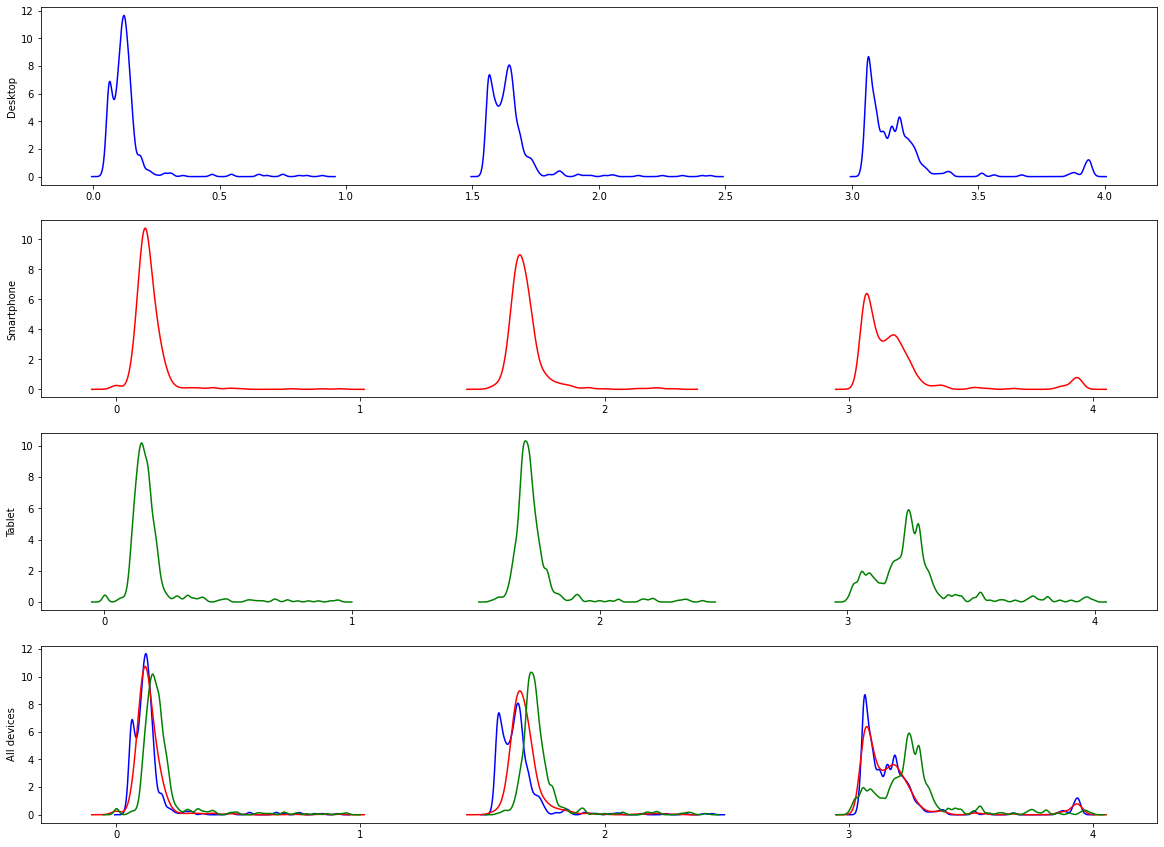

In [71]:
fig, ax = plt.subplots(4,1,figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x111_d, y111_d, color = 'b')
ax[0].set(ylabel='Desktop')
ax[1].plot(x111_m, y111_m, color = 'r')
ax[1].set(ylabel='Smartphone')
ax[2].plot(x111_t, y111_t, color = 'g')
ax[2].set(ylabel='Tablet')
ax[0].plot(x121_d+1.5, y121_d, color = 'b')
ax[1].plot(x121_m+1.5, y121_m, color = 'r')
ax[2].plot(x121_t+1.5, y121_t, color = 'g')
ax[0].plot(x131_d+3, y131_d, color = 'b')
ax[1].plot(x131_m+3, y131_m, color = 'r' )
ax[2].plot(x131_t+3, y131_t, color = 'g')
ax[3].plot(x111_d, y111_d, color = 'b')
ax[3].set(ylabel='All devices')
ax[3].plot(x111_m, y111_m, color = 'r')
ax[3].plot(x111_t, y111_t, color = 'g')
ax[3].plot(x121_d+1.5, y121_d, color = 'b')
ax[3].plot(x121_m+1.5, y121_m, color = 'r')
ax[3].plot(x121_t+1.5, y121_t, color = 'g')
ax[3].plot(x131_d+3, y131_d, color = 'b')
ax[3].plot(x131_m+3, y131_m, color = 'r')
ax[3].plot(x131_t+3, y131_t, color = 'g')
plt.show()

In [149]:
Inter_KL_df_user1

,User,F value,Combination,KL
0,User1,F1,D1D2,206.828730
1,User1,F1,D1D3,688.370799
2,User1,F1,D2D3,376.138903
3,User1,F1,M1M2,177.887308
4,User1,F1,M1M3,540.181168
5,User1,F1,M2M3,892.509381
6,User1,F1,T1T2,18.293687
7,User1,F1,T1T3,963.032788
8,User1,F1,T2T3,908.149845
9,User1,F1,D1M1,2340.733155


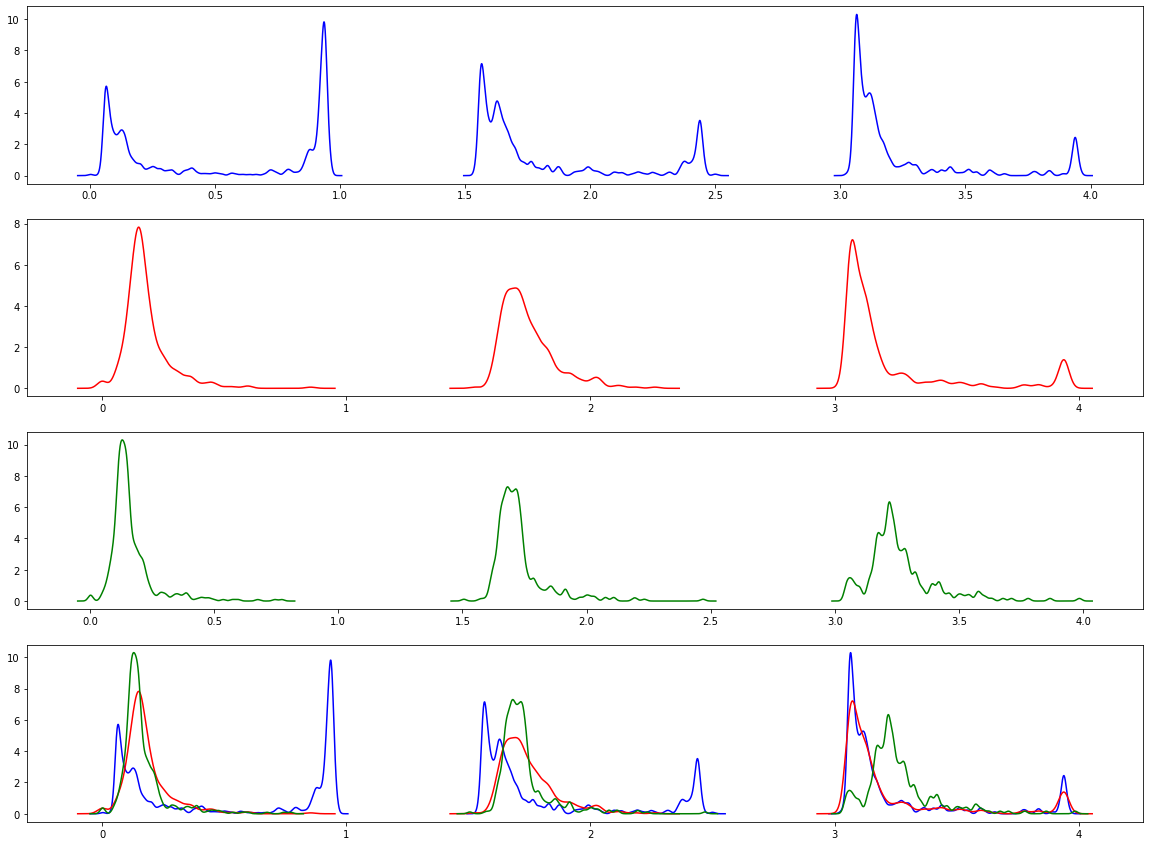

In [263]:
fig, ax = plt.subplots(4,1, figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x211_d, y211_d, color = 'b')
ax[1].plot(x211_m, y211_m, color = 'r')
ax[2].plot(x211_t, y211_t, color = 'g')
ax[0].plot(x221_d+1.5, y221_d, color = 'b')
ax[1].plot(x221_m+1.5, y221_m, color = 'r')
ax[2].plot(x221_t+1.5, y221_t, color = 'g')
ax[0].plot(x231_d+3, y231_d, color = 'b')
ax[1].plot(x231_m+3, y231_m, color = 'r')
ax[2].plot(x231_t+3, y231_t, color = 'g')
ax[3].plot(x211_d, y211_d, color = 'b')
ax[3].plot(x211_m, y211_m, color = 'r')
ax[3].plot(x211_t, y211_t, color = 'g')
ax[3].plot(x221_d+1.5, y221_d, color = 'b')
ax[3].plot(x221_m+1.5, y221_m, color = 'r')
ax[3].plot(x221_t+1.5, y221_t, color = 'g')
ax[3].plot(x231_d+3, y231_d, color = 'b')
ax[3].plot(x231_m+3, y231_m, color = 'r')
ax[3].plot(x231_t+3, y231_t, color = 'g')
plt.show()

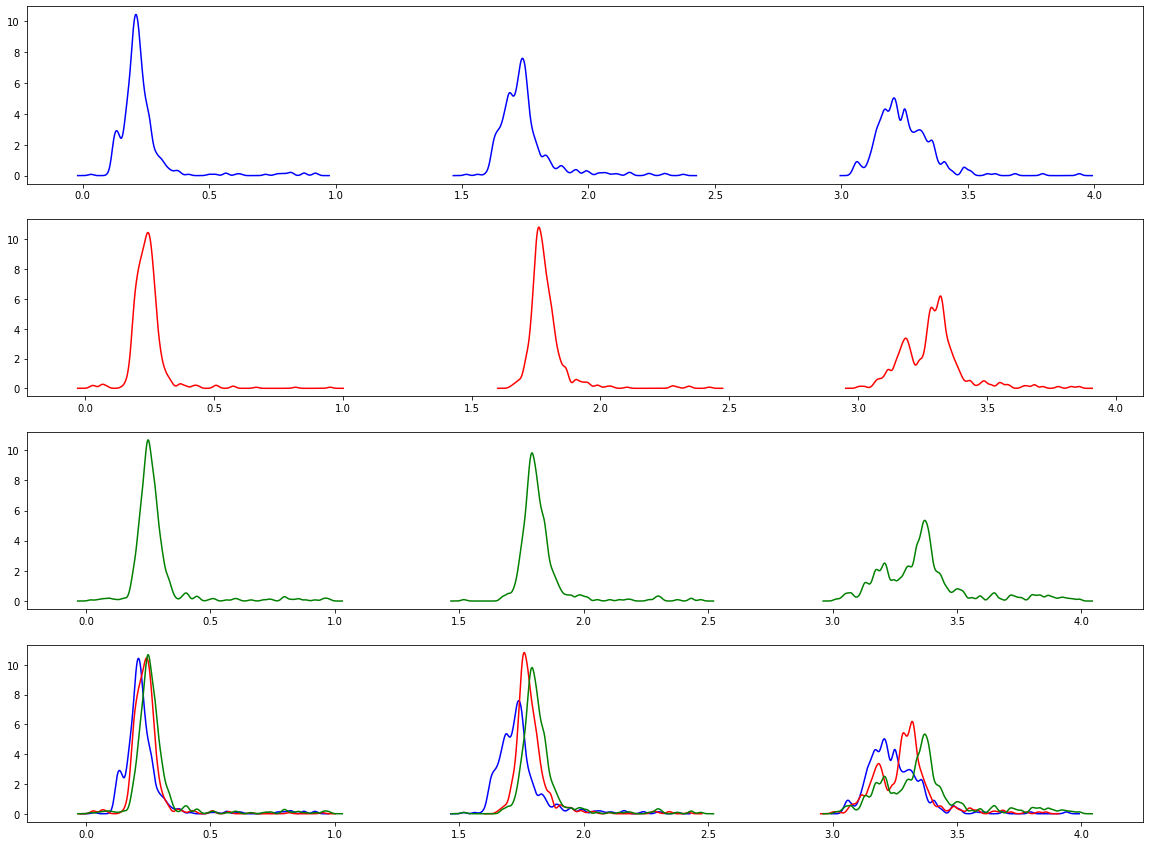

In [271]:
fig, ax = plt.subplots(4,1, figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x112_d, y112_d, color = 'b')
ax[1].plot(x112_m, y112_m, color = 'r')
ax[2].plot(x112_t, y112_t, color = 'g')
ax[0].plot(x122_d+1.5, y122_d, color = 'b')
ax[1].plot(x122_m+1.5, y122_m, color = 'r')
ax[2].plot(x122_t+1.5, y122_t, color = 'g')
ax[0].plot(x132_d+3, y132_d, color = 'b')
ax[1].plot(x132_m+3, y132_m, color = 'r' )
ax[2].plot(x132_t+3, y132_t, color = 'g')
ax[3].plot(x112_d, y112_d, color = 'b')
ax[3].plot(x112_m, y112_m, color = 'r')
ax[3].plot(x112_t, y112_t, color = 'g')
ax[3].plot(x122_d+1.5, y122_d, color = 'b')
ax[3].plot(x122_m+1.5, y122_m, color = 'r')
ax[3].plot(x122_t+1.5, y122_t, color = 'g')
ax[3].plot(x132_d+3, y132_d, color = 'b')
ax[3].plot(x132_m+3, y132_m, color = 'r')
ax[3].plot(x132_t+3, y132_t, color = 'g')
plt.show()

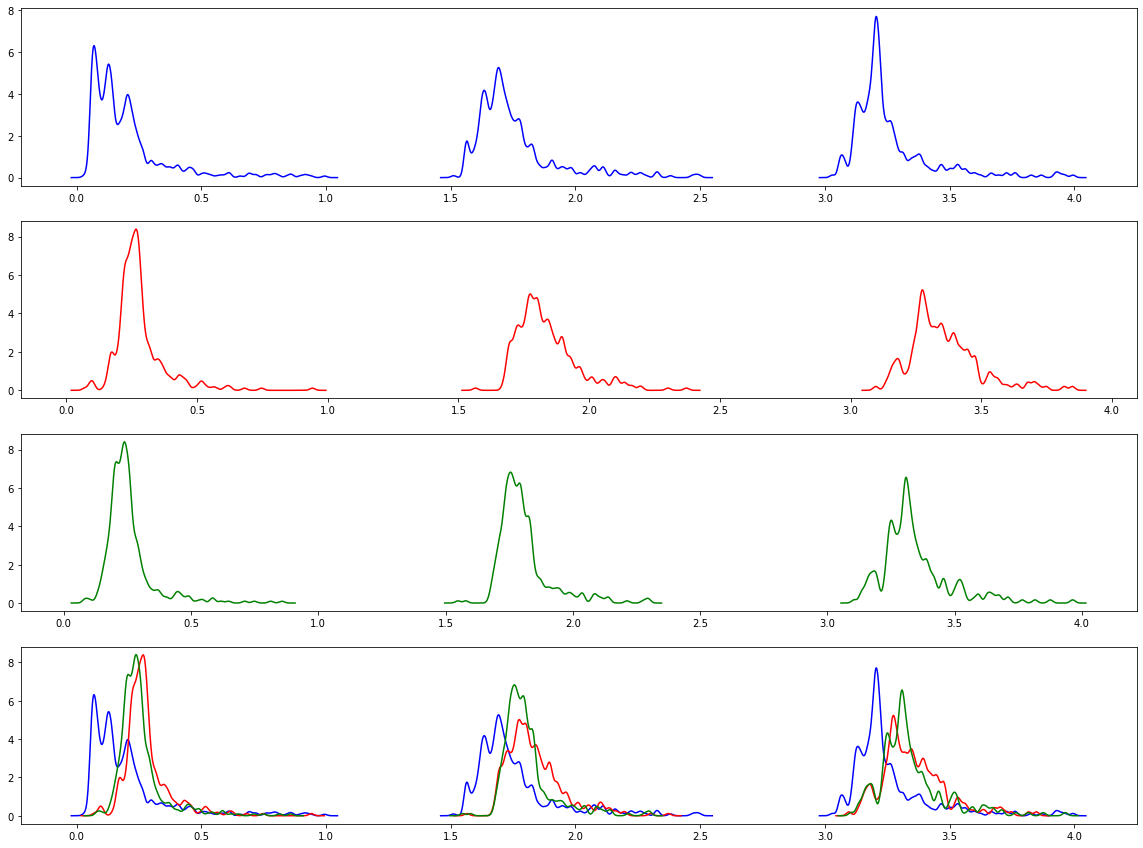

In [278]:
fig, ax = plt.subplots(4,1, figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x212_d, y212_d, color = 'b')
ax[1].plot(x212_m, y212_m, color = 'r')
ax[2].plot(x212_t, y212_t, color = 'g')
ax[0].plot(x222_d+1.5, y222_d, color = 'b')
ax[1].plot(x222_m+1.5, y222_m, color = 'r')
ax[2].plot(x222_t+1.5, y222_t, color = 'g')
ax[0].plot(x232_d+3, y232_d, color = 'b')
ax[1].plot(x232_m+3, y232_m, color = 'r')
ax[2].plot(x232_t+3, y232_t, color = 'g')
ax[3].plot(x212_d, y212_d, color = 'b')
ax[3].plot(x212_m, y212_m, color = 'r')
ax[3].plot(x212_t, y212_t, color = 'g')
ax[3].plot(x222_d+1.5, y222_d, color = 'b')
ax[3].plot(x222_m+1.5, y222_m, color = 'r')
ax[3].plot(x222_t+1.5, y222_t, color = 'g')
ax[3].plot(x232_d+3, y232_d, color = 'b')
ax[3].plot(x232_m+3, y232_m, color = 'r')
ax[3].plot(x232_t+3, y232_t, color = 'g')
plt.show()

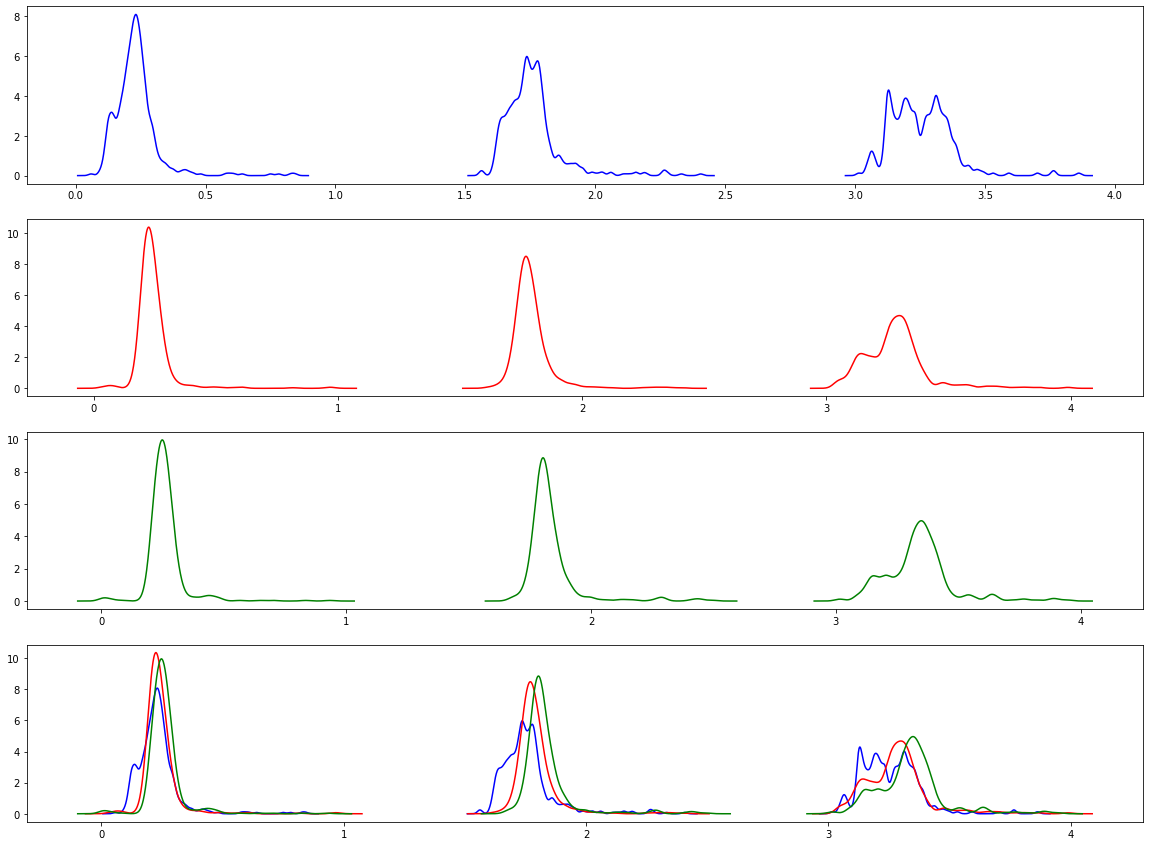

In [279]:
fig, ax = plt.subplots(4,1, figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x113_d, y113_d, color = 'b')
ax[1].plot(x113_m, y113_m, color = 'r')
ax[2].plot(x113_t, y113_t, color = 'g')
ax[0].plot(x123_d+1.5, y123_d, color = 'b')
ax[1].plot(x123_m+1.5, y123_m, color = 'r')
ax[2].plot(x123_t+1.5, y123_t, color = 'g')
ax[0].plot(x133_d+3, y133_d, color = 'b')
ax[1].plot(x133_m+3, y133_m, color = 'r' )
ax[2].plot(x133_t+3, y133_t, color = 'g')
ax[3].plot(x113_d, y113_d, color = 'b')
ax[3].plot(x113_m, y113_m, color = 'r')
ax[3].plot(x113_t, y113_t, color = 'g')
ax[3].plot(x123_d+1.5, y123_d, color = 'b')
ax[3].plot(x123_m+1.5, y123_m, color = 'r')
ax[3].plot(x123_t+1.5, y123_t, color = 'g')
ax[3].plot(x133_d+3, y133_d, color = 'b')
ax[3].plot(x133_m+3, y133_m, color = 'r')
ax[3].plot(x133_t+3, y133_t, color = 'g')
plt.show()

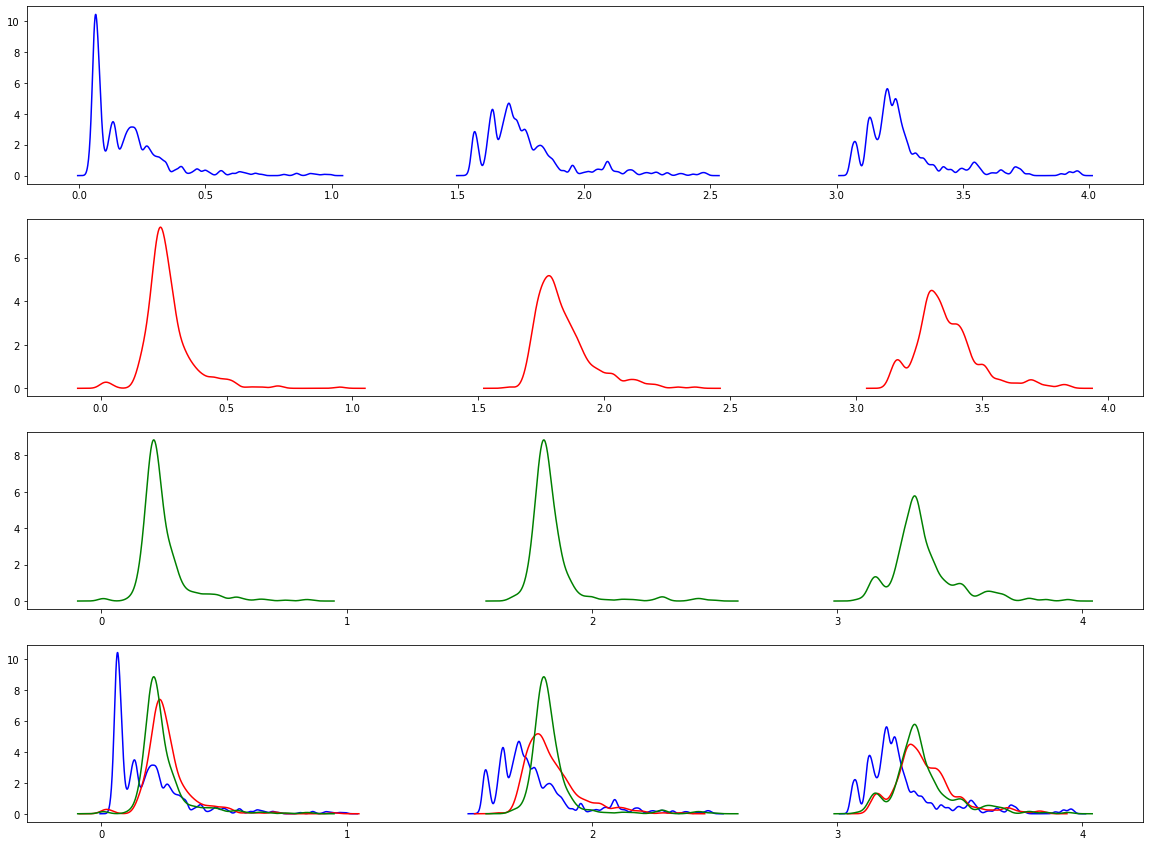

In [280]:
fig, ax = plt.subplots(4,1, figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x213_d, y213_d, color = 'b')
ax[1].plot(x213_m, y213_m, color = 'r')
ax[2].plot(x213_t, y213_t, color = 'g')
ax[0].plot(x223_d+1.5, y223_d, color = 'b')
ax[1].plot(x223_m+1.5, y223_m, color = 'r')
ax[2].plot(x223_t+1.5, y223_t, color = 'g')
ax[0].plot(x233_d+3, y233_d, color = 'b')
ax[1].plot(x233_m+3, y233_m, color = 'r')
ax[2].plot(x233_t+3, y233_t, color = 'g')
ax[3].plot(x213_d, y213_d, color = 'b')
ax[3].plot(x213_m, y213_m, color = 'r')
ax[3].plot(x213_t, y213_t, color = 'g')
ax[3].plot(x223_d+1.5, y223_d, color = 'b')
ax[3].plot(x223_m+1.5, y223_m, color = 'r')
ax[3].plot(x223_t+1.5, y223_t, color = 'g')
ax[3].plot(x233_d+3, y233_d, color = 'b')
ax[3].plot(x233_m+3, y233_m, color = 'r')
ax[3].plot(x233_t+3, y233_t, color = 'g')
plt.show()

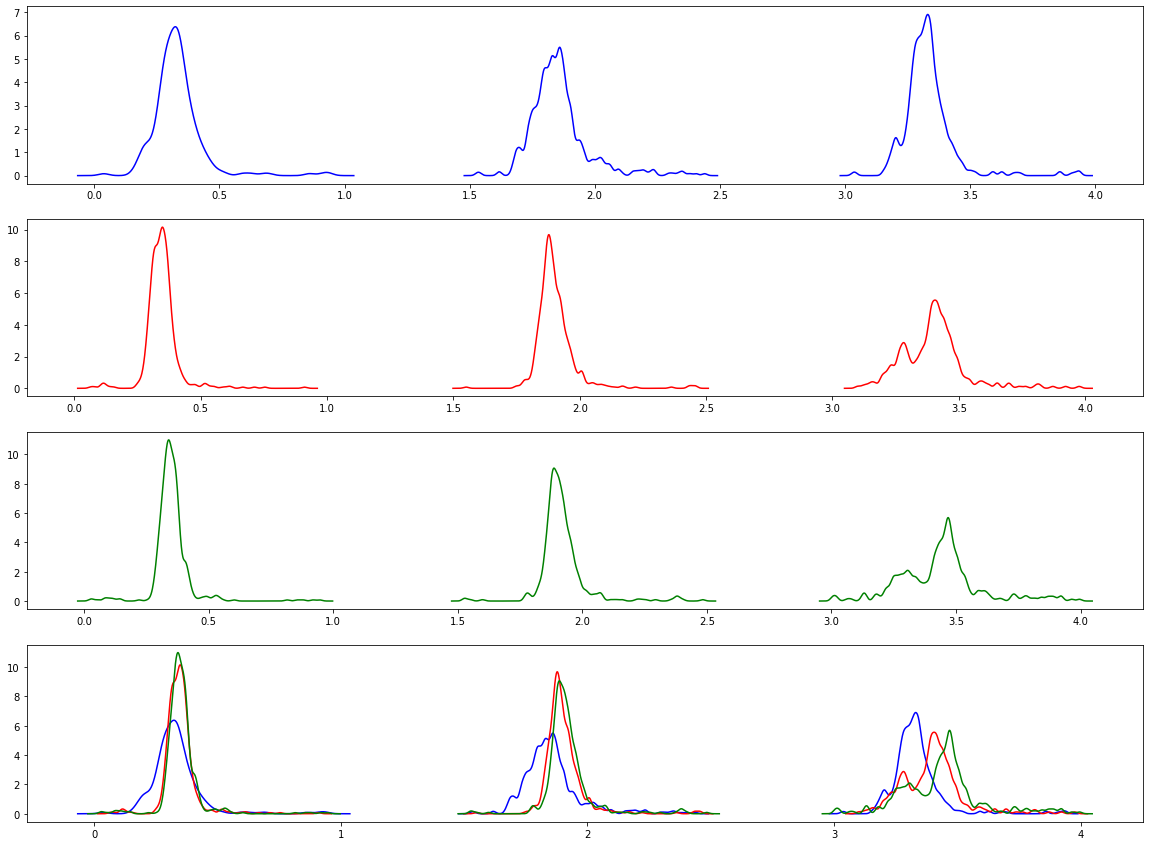

In [281]:
fig, ax = plt.subplots(4,1, figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x114_d, y114_d, color = 'b')
ax[1].plot(x114_m, y114_m, color = 'r')
ax[2].plot(x114_t, y114_t, color = 'g')
ax[0].plot(x124_d+1.5, y124_d, color = 'b')
ax[1].plot(x124_m+1.5, y124_m, color = 'r')
ax[2].plot(x124_t+1.5, y124_t, color = 'g')
ax[0].plot(x134_d+3, y134_d, color = 'b')
ax[1].plot(x134_m+3, y134_m, color = 'r' )
ax[2].plot(x134_t+3, y134_t, color = 'g')
ax[3].plot(x114_d, y114_d, color = 'b')
ax[3].plot(x114_m, y114_m, color = 'r')
ax[3].plot(x114_t, y114_t, color = 'g')
ax[3].plot(x124_d+1.5, y124_d, color = 'b')
ax[3].plot(x124_m+1.5, y124_m, color = 'r')
ax[3].plot(x124_t+1.5, y124_t, color = 'g')
ax[3].plot(x134_d+3, y134_d, color = 'b')
ax[3].plot(x134_m+3, y134_m, color = 'r')
ax[3].plot(x134_t+3, y134_t, color = 'g')
plt.show()

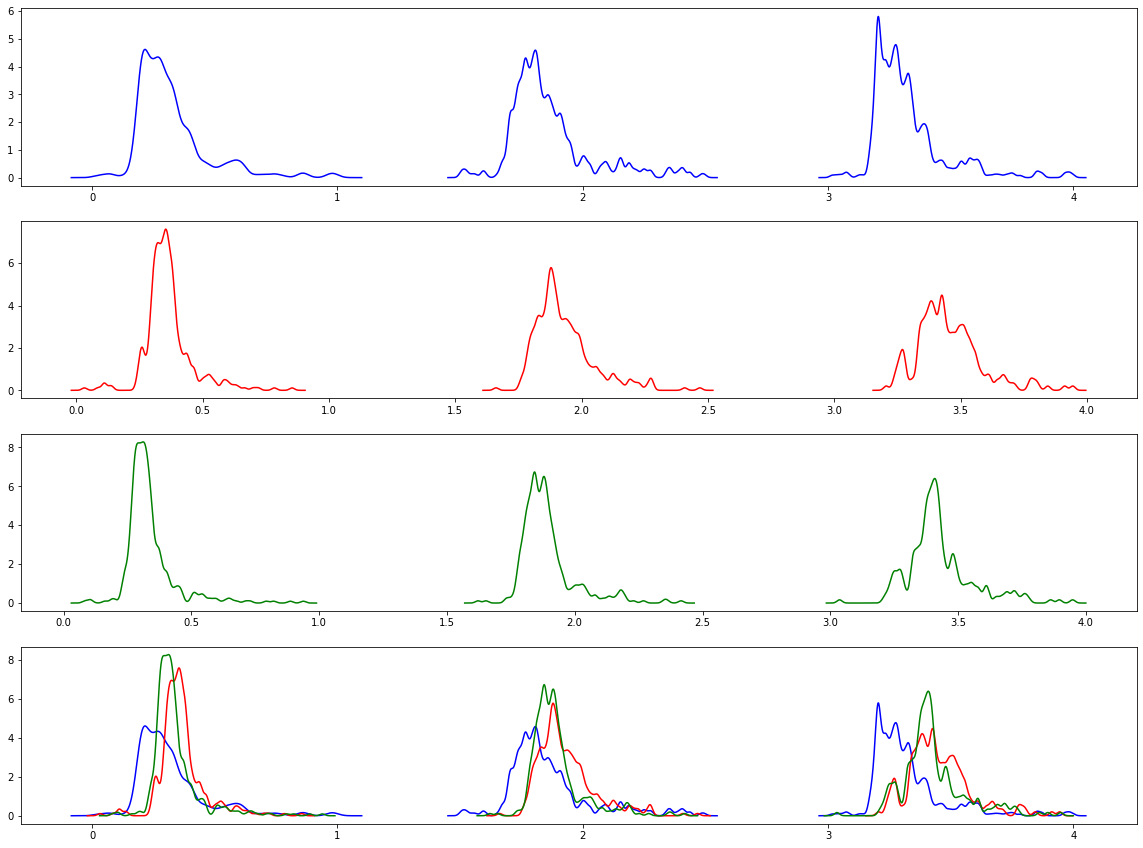

In [282]:
fig, ax = plt.subplots(4,1, figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x214_d, y214_d, color = 'b')
ax[1].plot(x214_m, y214_m, color = 'r')
ax[2].plot(x214_t, y214_t, color = 'g')
ax[0].plot(x224_d+1.5, y224_d, color = 'b')
ax[1].plot(x224_m+1.5, y224_m, color = 'r')
ax[2].plot(x224_t+1.5, y224_t, color = 'g')
ax[0].plot(x234_d+3, y234_d, color = 'b')
ax[1].plot(x234_m+3, y234_m, color = 'r')
ax[2].plot(x234_t+3, y234_t, color = 'g')
ax[3].plot(x214_d, y214_d, color = 'b')
ax[3].plot(x214_m, y214_m, color = 'r')
ax[3].plot(x214_t, y214_t, color = 'g')
ax[3].plot(x224_d+1.5, y224_d, color = 'b')
ax[3].plot(x224_m+1.5, y224_m, color = 'r')
ax[3].plot(x224_t+1.5, y224_t, color = 'g')
ax[3].plot(x234_d+3, y234_d, color = 'b')
ax[3].plot(x234_m+3, y234_m, color = 'r')
ax[3].plot(x234_t+3, y234_t, color = 'g')
plt.show()

### Distance 1 for all F values in three devices - User 1

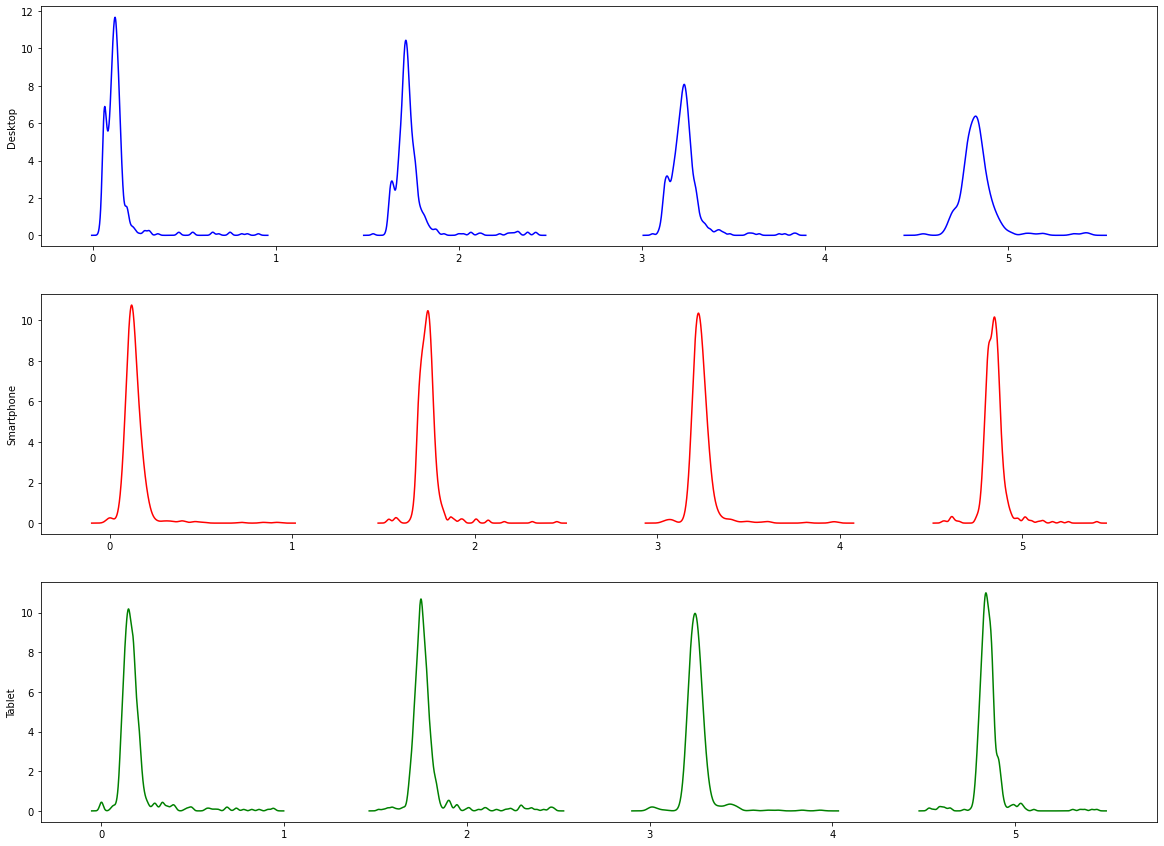

In [72]:
fig, ax = plt.subplots(3,1,figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x111_d, y111_d, color = 'b')
ax[0].set(ylabel='Desktop')
ax[1].plot(x111_m, y111_m, color = 'r')
ax[1].set(ylabel='Smartphone')
ax[2].plot(x111_t, y111_t, color = 'g')
ax[2].set(ylabel='Tablet')
ax[0].plot(x112_d+1.5, y112_d, color = 'b')
ax[1].plot(x112_m+1.5, y112_m, color = 'r')
ax[2].plot(x112_t+1.5, y112_t, color = 'g')
ax[0].plot(x113_d+3, y113_d, color = 'b')
ax[1].plot(x113_m+3, y113_m, color = 'r' )
ax[2].plot(x113_t+3, y113_t, color = 'g')
ax[0].plot(x114_d+4.5, y114_d, color = 'b')
ax[1].plot(x114_m+4.5, y114_m, color = 'r' )
ax[2].plot(x114_t+4.5, y114_t, color = 'g')
# ax[3].plot(x111_d, y111_d, color = 'b')
# ax[3].set(ylabel='All devices')
# ax[3].plot(x111_m, y111_m, color = 'r')
# ax[3].plot(x111_t, y111_t, color = 'g')
# ax[3].plot(x121_d+1.5, y121_d, color = 'b')
# ax[3].plot(x121_m+1.5, y121_m, color = 'r')
# ax[3].plot(x121_t+1.5, y121_t, color = 'g')
# ax[3].plot(x131_d+3, y131_d, color = 'b')
# ax[3].plot(x131_m+3, y131_m, color = 'r')
# ax[3].plot(x131_t+3, y131_t, color = 'g')
plt.show()

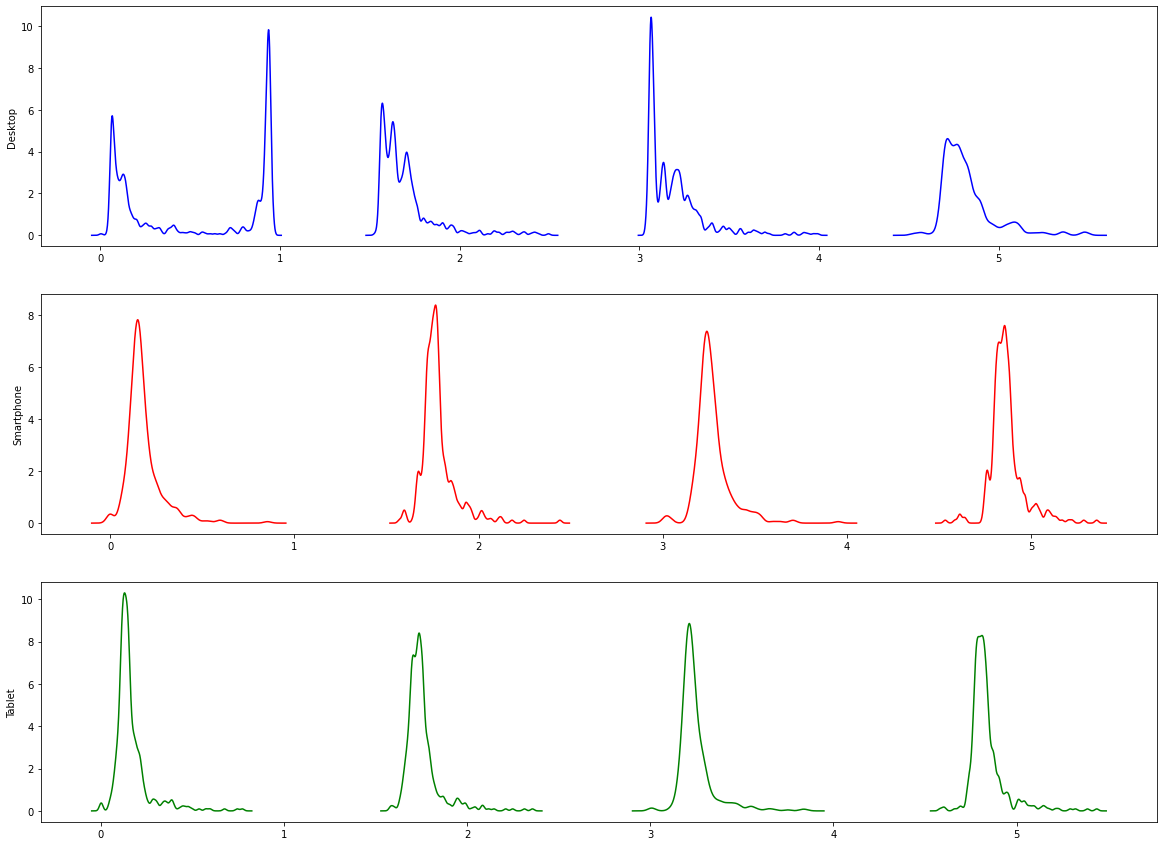

In [73]:
fig, ax = plt.subplots(3,1,figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x211_d, y211_d, color = 'b')
ax[0].set(ylabel='Desktop')
ax[1].plot(x211_m, y211_m, color = 'r')
ax[1].set(ylabel='Smartphone')
ax[2].plot(x211_t, y211_t, color = 'g')
ax[2].set(ylabel='Tablet')
ax[0].plot(x212_d+1.5, y212_d, color = 'b')
ax[1].plot(x212_m+1.5, y212_m, color = 'r')
ax[2].plot(x212_t+1.5, y212_t, color = 'g')
ax[0].plot(x213_d+3, y213_d, color = 'b')
ax[1].plot(x213_m+3, y213_m, color = 'r' )
ax[2].plot(x213_t+3, y213_t, color = 'g')
ax[0].plot(x214_d+4.5, y214_d, color = 'b')
ax[1].plot(x214_m+4.5, y214_m, color = 'r' )
ax[2].plot(x214_t+4.5, y214_t, color = 'g')
# ax[3].plot(x111_d, y111_d, color = 'b')
# ax[3].set(ylabel='All devices')
# ax[3].plot(x111_m, y111_m, color = 'r')
# ax[3].plot(x111_t, y111_t, color = 'g')
# ax[3].plot(x121_d+1.5, y121_d, color = 'b')
# ax[3].plot(x121_m+1.5, y121_m, color = 'r')
# ax[3].plot(x121_t+1.5, y121_t, color = 'g')
# ax[3].plot(x131_d+3, y131_d, color = 'b')
# ax[3].plot(x131_m+3, y131_m, color = 'r')
# ax[3].plot(x131_t+3, y131_t, color = 'g')
plt.show()

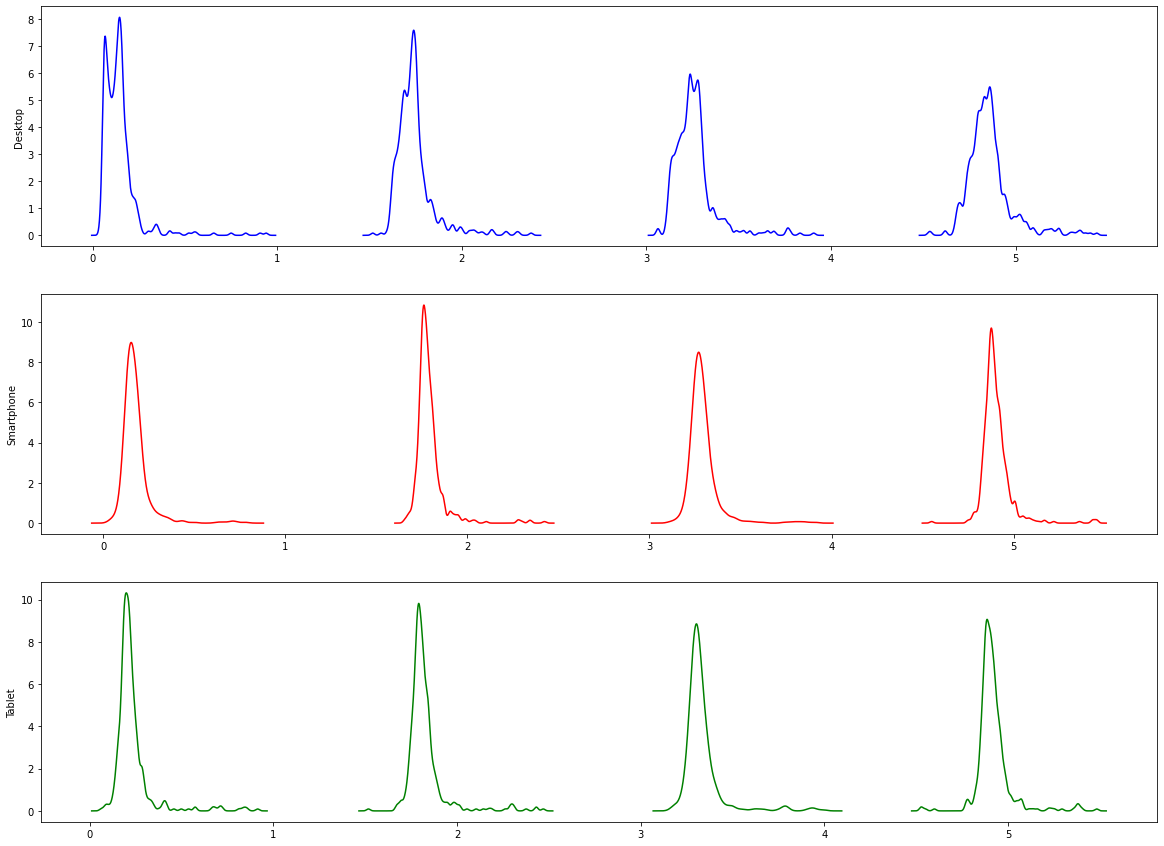

In [74]:
fig, ax = plt.subplots(3,1,figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x121_d, y121_d, color = 'b')
ax[0].set(ylabel='Desktop')
ax[1].plot(x121_m, y121_m, color = 'r')
ax[1].set(ylabel='Smartphone')
ax[2].plot(x121_t, y121_t, color = 'g')
ax[2].set(ylabel='Tablet')
ax[0].plot(x122_d+1.5, y122_d, color = 'b')
ax[1].plot(x122_m+1.5, y122_m, color = 'r')
ax[2].plot(x122_t+1.5, y122_t, color = 'g')
ax[0].plot(x123_d+3, y123_d, color = 'b')
ax[1].plot(x123_m+3, y123_m, color = 'r' )
ax[2].plot(x123_t+3, y123_t, color = 'g')
ax[0].plot(x124_d+4.5, y124_d, color = 'b')
ax[1].plot(x124_m+4.5, y124_m, color = 'r' )
ax[2].plot(x124_t+4.5, y124_t, color = 'g')
plt.show()

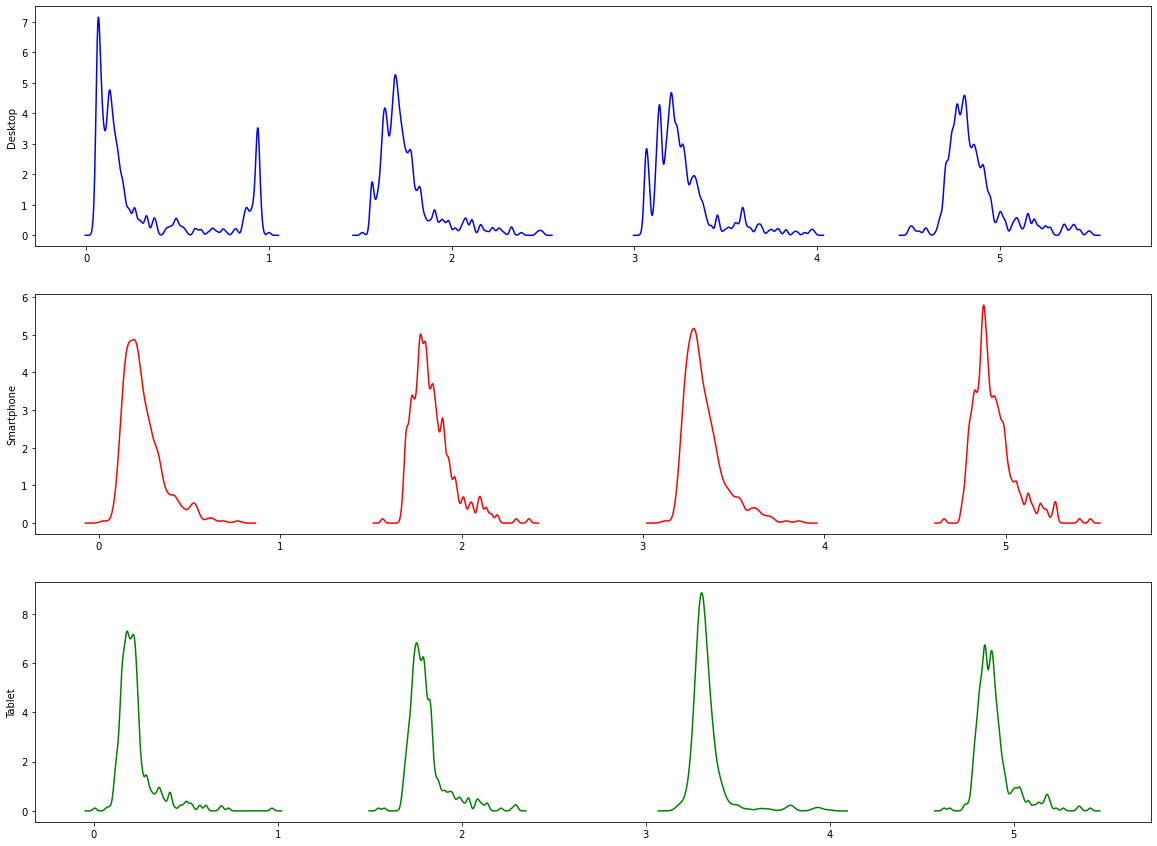

In [76]:
fig, ax = plt.subplots(3,1,figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x221_d, y221_d, color = 'b')
ax[0].set(ylabel='Desktop')
ax[1].plot(x221_m, y221_m, color = 'r')
ax[1].set(ylabel='Smartphone')
ax[2].plot(x221_t, y221_t, color = 'g')
ax[2].set(ylabel='Tablet')
ax[0].plot(x222_d+1.5, y222_d, color = 'b')
ax[1].plot(x222_m+1.5, y222_m, color = 'r')
ax[2].plot(x222_t+1.5, y222_t, color = 'g')
ax[0].plot(x223_d+3, y223_d, color = 'b')
ax[1].plot(x223_m+3, y223_m, color = 'r' )
ax[2].plot(x223_t+3, y223_t, color = 'g')
ax[0].plot(x224_d+4.5, y224_d, color = 'b')
ax[1].plot(x224_m+4.5, y224_m, color = 'r' )
ax[2].plot(x224_t+4.5, y224_t, color = 'g')
plt.show()

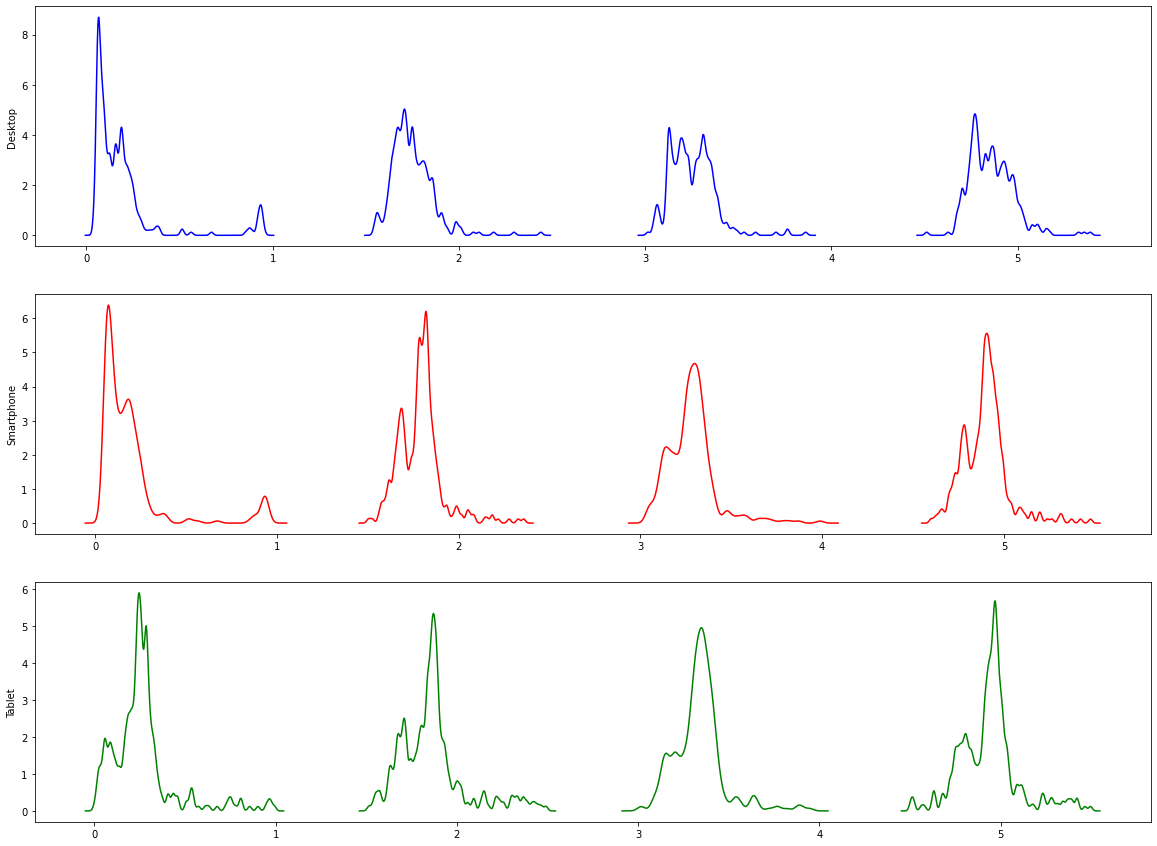

In [75]:
fig, ax = plt.subplots(3,1,figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x131_d, y131_d, color = 'b')
ax[0].set(ylabel='Desktop')
ax[1].plot(x131_m, y131_m, color = 'r')
ax[1].set(ylabel='Smartphone')
ax[2].plot(x131_t, y131_t, color = 'g')
ax[2].set(ylabel='Tablet')
ax[0].plot(x132_d+1.5, y132_d, color = 'b')
ax[1].plot(x132_m+1.5, y132_m, color = 'r')
ax[2].plot(x132_t+1.5, y132_t, color = 'g')
ax[0].plot(x133_d+3, y133_d, color = 'b')
ax[1].plot(x133_m+3, y133_m, color = 'r' )
ax[2].plot(x133_t+3, y133_t, color = 'g')
ax[0].plot(x134_d+4.5, y134_d, color = 'b')
ax[1].plot(x134_m+4.5, y134_m, color = 'r' )
ax[2].plot(x134_t+4.5, y134_t, color = 'g')
plt.show()

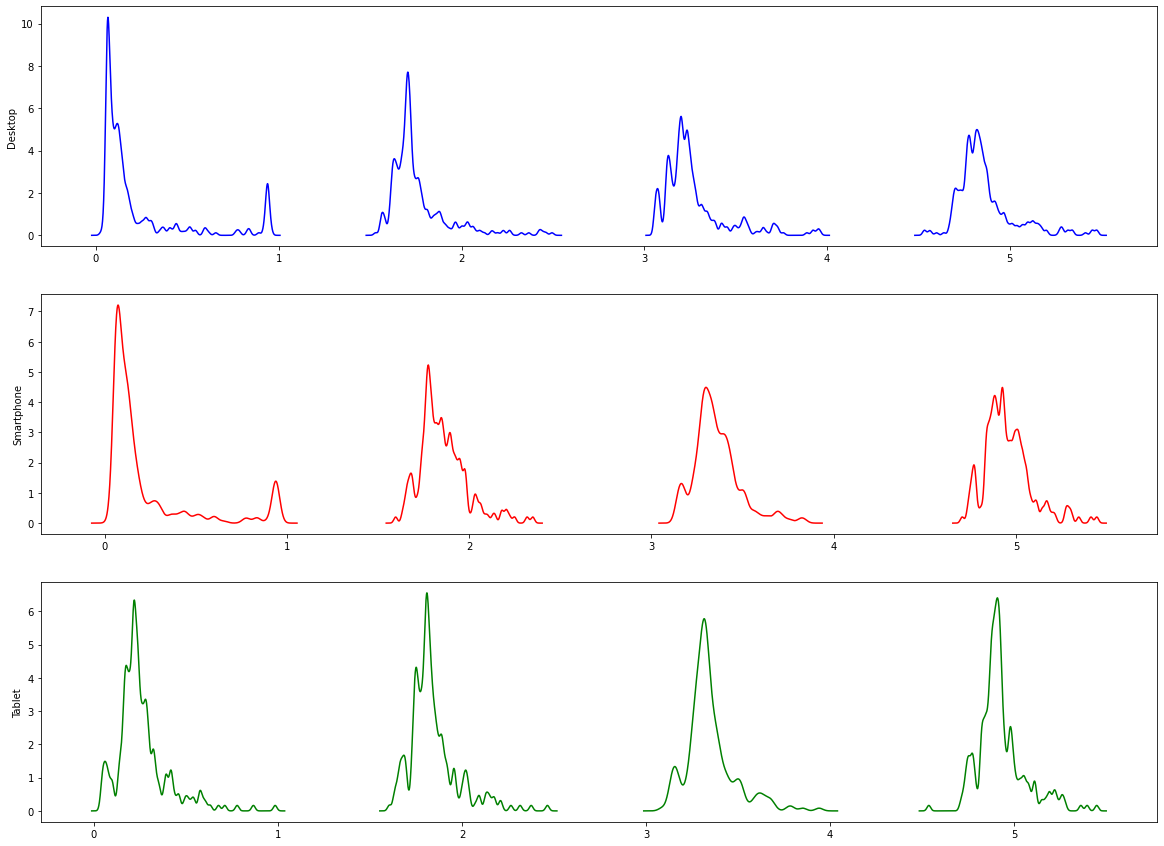

In [77]:
fig, ax = plt.subplots(3,1,figsize=(20,15))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax[0].plot(x231_d, y231_d, color = 'b')
ax[0].set(ylabel='Desktop')
ax[1].plot(x231_m, y231_m, color = 'r')
ax[1].set(ylabel='Smartphone')
ax[2].plot(x231_t, y231_t, color = 'g')
ax[2].set(ylabel='Tablet')
ax[0].plot(x232_d+1.5, y232_d, color = 'b')
ax[1].plot(x232_m+1.5, y232_m, color = 'r')
ax[2].plot(x232_t+1.5, y232_t, color = 'g')
ax[0].plot(x233_d+3, y233_d, color = 'b')
ax[1].plot(x233_m+3, y233_m, color = 'r' )
ax[2].plot(x233_t+3, y233_t, color = 'g')
ax[0].plot(x234_d+4.5, y234_d, color = 'b')
ax[1].plot(x234_m+4.5, y234_m, color = 'r' )
ax[2].plot(x234_t+4.5, y234_t, color = 'g')
plt.show()

In [40]:
def kl_divergence(p, q):
    if len(p)>len(q):
        p = p[0:len(q)]
    elif len(q)>len(p):
        q = q[0:len(p)]
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [96]:
col_head = ["User","F value", "Combination", "KL"]
inter_kl_U1 = [
    ["User1","F1", "D1D2",kl_divergence(y111_d, y121_d)],
    ["User1","F1", "D1D3",kl_divergence(y111_d, y131_d)], 
    ["User1","F1", "D2D3",kl_divergence(y121_d, y131_d)],
    ["User1","F1", "M1M2",kl_divergence(y111_m, y121_m)],
    ["User1","F1", "M1M3",kl_divergence(y111_m, y131_m)],
    ["User1","F1", "M2M3",kl_divergence(y121_m, y131_m)],
    ["User1","F1", "T1T2",kl_divergence(y111_t, y121_t)],
    ["User1","F1", "T1T3",kl_divergence(y111_t, y131_t)],
    ["User1","F1", "T2T3",kl_divergence(y121_t, y131_t)],
    ["User1","F1", "D1M1",kl_divergence(y111_d, y111_m)],
    ["User1","F1", "D2M2",kl_divergence(y121_d, y121_m)],
    ["User1","F1", "D3M3",kl_divergence(y131_d, y131_m)],
    ["User1","F1", "D1T1",kl_divergence(y111_d, y111_t)],
    ["User1","F1", "D2T2",kl_divergence(y121_d, y121_t)],
    ["User1","F1", "D3T3",kl_divergence(y131_d, y131_t)],
    ["User1","F1", "M1T1",kl_divergence(y111_m, y111_t)],
    ["User1","F1", "M2T2",kl_divergence(y121_m, y121_t)],
    ["User1","F1", "M3T3",kl_divergence(y131_m, y131_t)]
]

Inter_KL_df_user1 = pd.DataFrame(inter_kl_U1, columns=col_head)

In [97]:
col_head = ["User","F value", "Combination", "KL"]
inter_kl_U2 = [
    ["User2","F1", "D1D2",kl_divergence(y211_d, y221_d)],
    ["User2","F1", "D1D3",kl_divergence(y211_d, y231_d)], 
    ["User2","F1", "D2D3",kl_divergence(y221_d, y231_d)],
    ["User2","F1", "M1M2",kl_divergence(y211_m, y221_m)],
    ["User2","F1", "M1M3",kl_divergence(y211_m, y231_m)],
    ["User2","F1", "M2M3",kl_divergence(y221_m, y231_m)],
    ["User2","F1", "T1T2",kl_divergence(y211_t, y221_t)],
    ["User2","F1", "T1T3",kl_divergence(y211_t, y231_t)],
    ["User2","F1", "T2T3",kl_divergence(y221_t, y231_t)],
    ["User2","F1", "D1M1",kl_divergence(y211_d, y211_m)],
    ["User2","F1", "D2M2",kl_divergence(y221_d, y221_m)],
    ["User2","F1", "D3M3",kl_divergence(y231_d, y231_m)],
    ["User2","F1", "D1T1",kl_divergence(y211_d, y211_t)],
    ["User2","F1", "D2T2",kl_divergence(y221_d, y221_t)],
    ["User2","F1", "D3T3",kl_divergence(y231_d, y231_t)],
    ["User2","F1", "M1T1",kl_divergence(y211_m, y211_t)],
    ["User2","F1", "M2T2",kl_divergence(y221_m, y221_t)],
    ["User2","F1", "M3T3",kl_divergence(y231_m, y231_t)]
]

Inter_KL_df_user2 = pd.DataFrame(inter_kl_U2, columns=col_head)

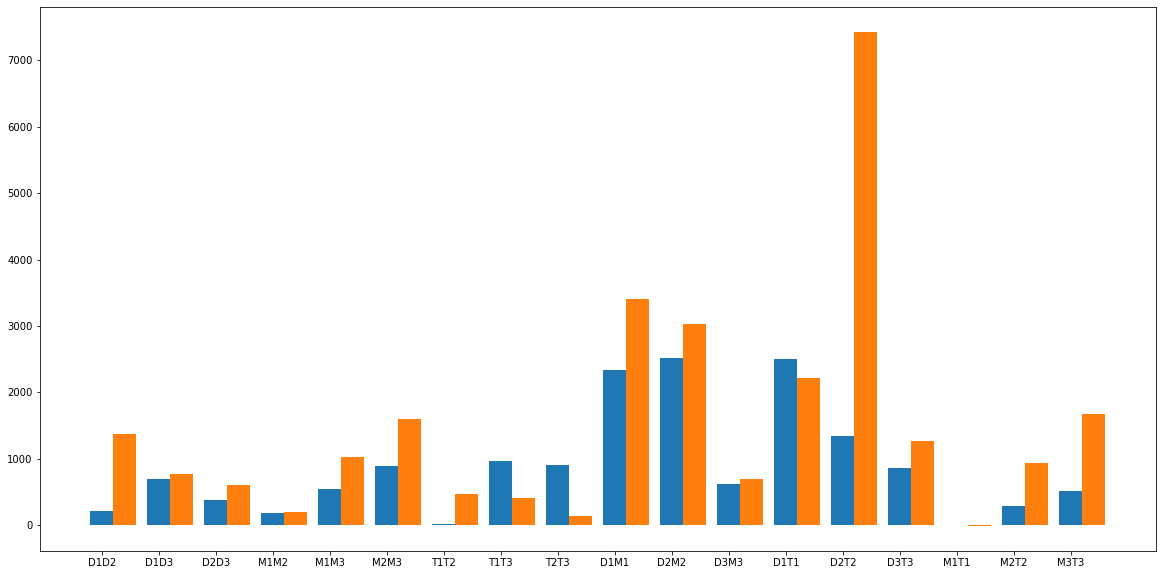

In [109]:
pos = np.arange(len(Inter_KL_df_user1['Combination']))
bar_width = 0.4
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(pos, Inter_KL_df_user1['KL'], bar_width)
plt.bar(pos+ bar_width, Inter_KL_df_user2['KL'], bar_width)
plt.xticks(pos, Inter_KL_df_user1['Combination'] )
plt.show()

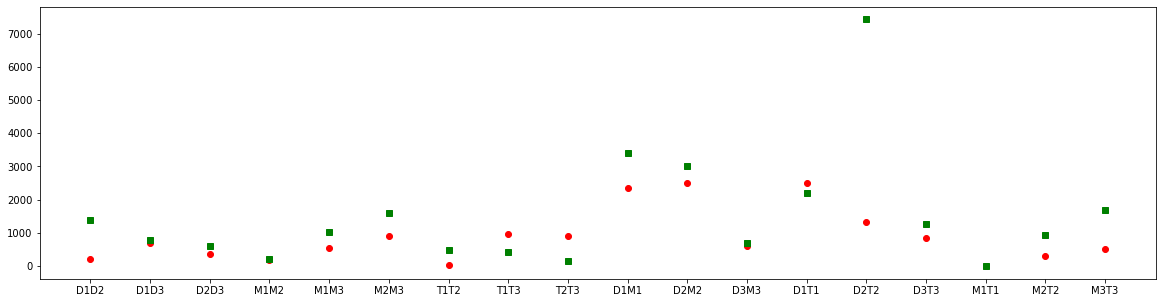

In [142]:
fig, ax = plt.subplots(figsize = (20,5) )
plt.plot(Inter_KL_df_user1['Combination'],Inter_KL_df_user1['KL'], 'ro')
plt.plot(Inter_KL_df_user2['Combination'],Inter_KL_df_user2['KL'], 'gs')
plt.show()

In [145]:
col_head = ["FirstUser","SecondUser","F value", "Combination", "KL"]
intra_kl_12 = [
    ["User1","User2","F1", "D1D1",kl_divergence(y111_d, y211_d)],
    ["User1","User2","F1", "D2D2",kl_divergence(y121_d, y221_d)],
    ["User1","User2","F1", "D3D3",kl_divergence(y131_d, y231_d)],
    ["User1","User2","F1", "M1M1",kl_divergence(y111_m, y211_m)],
    ["User1","User2","F1", "M2M2",kl_divergence(y121_m, y221_m)],
    ["User1","User2","F1", "M3M3",kl_divergence(y131_m, y231_m)],
    ["User1","User2","F1", "T1T1",kl_divergence(y111_t, y211_t)],
    ["User1","User2","F1", "T2T2",kl_divergence(y121_t, y221_t)],
    ["User1","User2","F1", "T3T3",kl_divergence(y131_t, y231_t)]
]

Intra_KL_F1_df = pd.DataFrame(intra_kl_12, columns=col_head)

In [146]:
col_head = ["FirstUser","SecondUser","F value", "Combination", "KL"]
intra_kl_12 = [
    ["User1","User2","F2", "D1D1",kl_divergence(y112_d, y212_d)],
    ["User1","User2","F2", "D2D2",kl_divergence(y122_d, y222_d)],
    ["User1","User2","F2", "D3D3",kl_divergence(y132_d, y232_d)],
    ["User1","User2","F2", "M1M1",kl_divergence(y112_m, y212_m)],
    ["User1","User2","F2", "M2M2",kl_divergence(y122_m, y222_m)],
    ["User1","User2","F2", "M3M3",kl_divergence(y132_m, y232_m)],
    ["User1","User2","F2", "T1T1",kl_divergence(y112_t, y212_t)],
    ["User1","User2","F2", "T2T2",kl_divergence(y122_t, y222_t)],
    ["User1","User2","F2", "T3T3",kl_divergence(y132_t, y232_t)]
]

Intra_KL_F2_df = pd.DataFrame(intra_kl_12, columns=col_head)

In [150]:
Intra_KL_F1_df

,FirstUser,SecondUser,F value,Combination,KL
0,User1,User2,F1,D1D1,1465.596698
1,User1,User2,F1,D2D2,369.605300
2,User1,User2,F1,D3D3,369.950280
3,User1,User2,F1,M1M1,408.127082
4,User1,User2,F1,M2M2,508.423392
5,User1,User2,F1,M3M3,195.794749
6,User1,User2,F1,T1T1,-26.374378
7,User1,User2,F1,T2T2,623.985541
8,User1,User2,F1,T3T3,332.854476


In [151]:
Inter_KL_df_user1

,User,F value,Combination,KL
0,User1,F1,D1D2,206.828730
1,User1,F1,D1D3,688.370799
2,User1,F1,D2D3,376.138903
3,User1,F1,M1M2,177.887308
4,User1,F1,M1M3,540.181168
5,User1,F1,M2M3,892.509381
6,User1,F1,T1T2,18.293687
7,User1,F1,T1T3,963.032788
8,User1,F1,T2T3,908.149845
9,User1,F1,D1M1,2340.733155


In [ ]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F4_dis_3 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame['F4'] = data_frame['F4']/999
        data_frame_dis_3 = data_frame_m[data_frame_m['Distance']==3]
        data = np.sort(np.array(User_1_Dis_1_desktop_F4['F4']))[:, np.newaxis]
        x, y = FFTKDE(kernel='gaussian', bw=0.02).fit(data).evaluate()


In [38]:
User_11_Dis_1_desktop = all_users_desktop_F1_dis_1[(all_users_desktop_F1_dis_1['User']==11) & (all_users_desktop_F1_dis_1['Hands']!= 'LR')]
User_11_Dis_1_mobile = all_users_mobile_F1_dis_1[(all_users_mobile_F1_dis_1['User']==11) &  (all_users_mobile_F1_dis_1['Hands']!= 'LR')]
User_11_Dis_1_tablet = all_users_tablet_F1_dis_1[(all_users_tablet_F1_dis_1['User']==11) &  (all_users_tablet_F1_dis_1['Hands']!= 'LR')]

In [39]:
data11 = np.sort(np.array(User_11_Dis_1_desktop['F1']))[:, np.newaxis]
x1111_d, y1111_d = FFTKDE(kernel='gaussian', bw=0.01).fit(data11).evaluate()

data11 = np.sort(np.array(User_11_Dis_1_mobile['F1']))[:, np.newaxis]
x1111_m, y1111_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data11).evaluate()

data11 = np.sort(np.array(User_11_Dis_1_tablet['F1']))[:, np.newaxis]
x1111_t, y1111_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data11).evaluate()

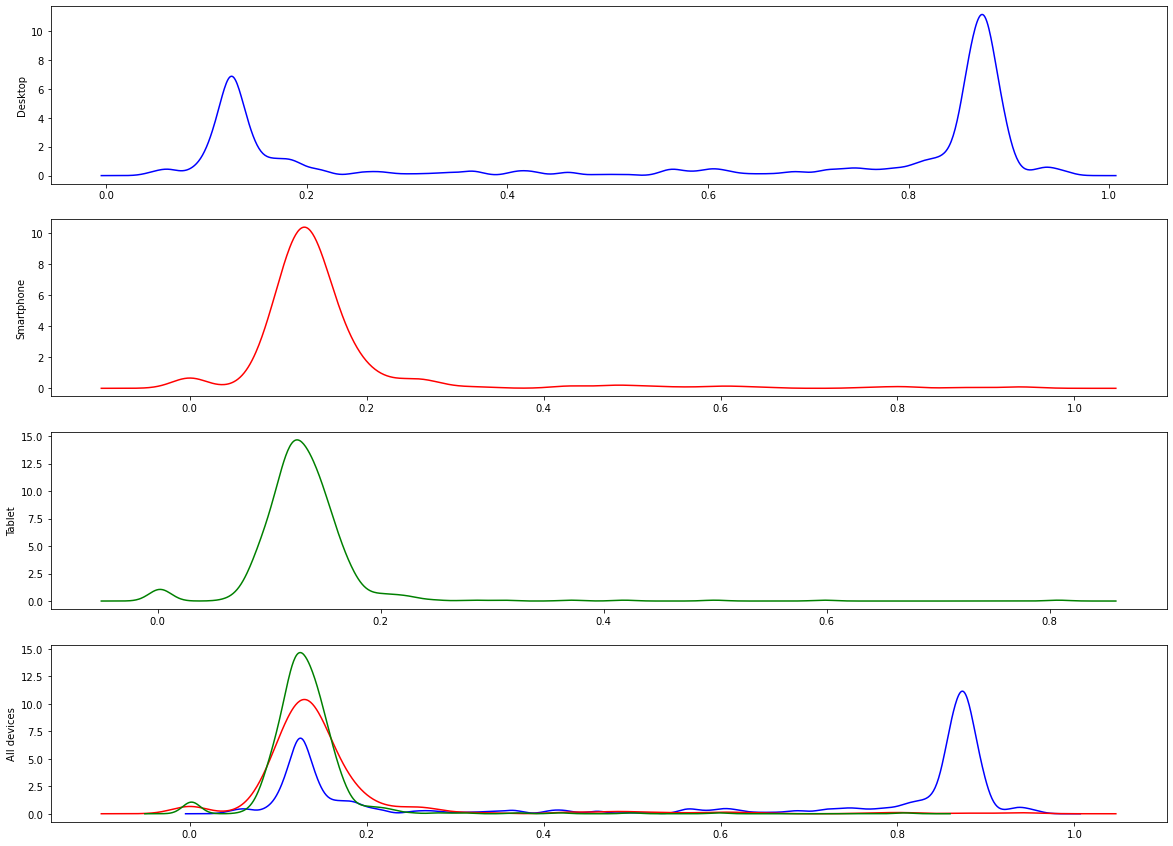

In [44]:
# ax3 = ax2.twinx()
fig, ax = plt.subplots(4,1,figsize=(20,15))
ax[0].plot(x1111_d, y1111_d, color = 'b')
ax[0].set(ylabel='Desktop')
ax[1].plot(x1111_m, y1111_m, color = 'r')
ax[1].set(ylabel='Smartphone')
ax[2].plot(x1111_t, y1111_t, color = 'g')
ax[2].set(ylabel='Tablet')
# ax[0].plot(x112_d+1.5, y112_d, color = 'b')
# ax[1].plot(x112_m+1.5, y112_m, color = 'r')
# ax[2].plot(x112_t+1.5, y112_t, color = 'g')
# ax[0].plot(x113_d+3, y113_d, color = 'b')
# ax[1].plot(x113_m+3, y113_m, color = 'r' )
# ax[2].plot(x113_t+3, y113_t, color = 'g')
# ax[0].plot(x114_d+4.5, y114_d, color = 'b')
# ax[1].plot(x114_m+4.5, y114_m, color = 'r' )
# ax[2].plot(x114_t+4.5, y114_t, color = 'g')
ax[3].plot(x1111_d, y1111_d, color = 'b')
ax[3].set(ylabel='All devices')
ax[3].plot(x1111_m, y1111_m, color = 'r')
ax[3].plot(x1111_t, y1111_t, color = 'g')
# ax[3].plot(x121_d+1.5, y121_d, color = 'b')
# ax[3].plot(x121_m+1.5, y121_m, color = 'r')
# ax[3].plot(x121_t+1.5, y121_t, color = 'g')
# ax[3].plot(x131_d+3, y131_d, color = 'b')
# ax[3].plot(x131_m+3, y131_m, color = 'r')
# ax[3].plot(x131_t+3, y131_t, color = 'g')
plt.show()

In [45]:
print(kl_divergence(y1111_d,y1111_m))

3092.939662840599


In [46]:
print(kl_divergence(y1111_d,y1111_t))

19008.257155632447


In [47]:
print(kl_divergence(y1111_m,y1111_t))

232.41894511942877
